## Unsupervised Learning

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_style('white')



### K-Means Clustering

Below we create some random data

In [16]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2)) # random distribution 50 data points
#Create 2 clusters
X[:25,0] = X[:25,0]+3 # shift by 3
X[:25,1] = X[:25,1]-4 # shift by -4

### K=2

In [17]:
km1 = KMeans(n_clusters=2, n_init=20) # run k means
km1.fit(X)
km1.labels_ # print the labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

In [18]:
# Sum of distances of samples to their closest cluster center.
km1.inertia_

99.30578397914682

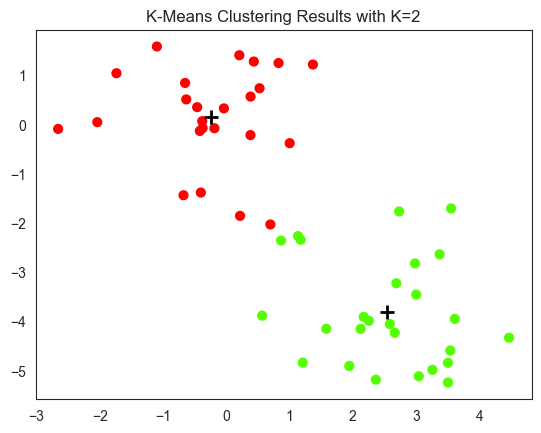

In [19]:
f, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax.set_title('K-Means Clustering Results with K=2')
ax.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)


### K=3

In [ ]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)


pd.Series(km2.labels_).value_counts() # show mow many in each cluster



0    21
2    20
1     9
Name: count, dtype: int64

In [21]:
km2.cluster_centers_

array([[ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345],
       [-0.27876523,  0.51224152]])

In [22]:
km2.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1], dtype=int32)

In [23]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.97379200939723

### K=3 
See plot below - 3 k-clusters but two actual normal distributed data

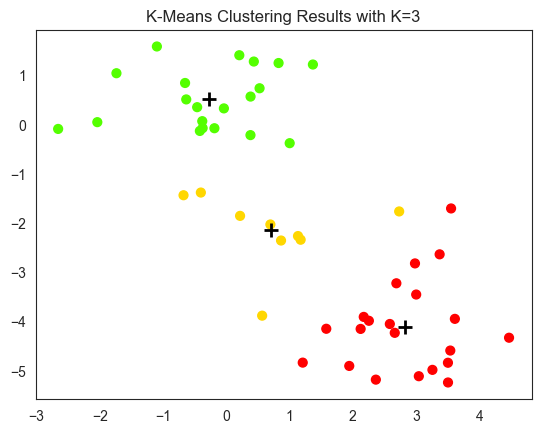

In [24]:
f, ax2 = plt.subplots()
ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### Question (Total 60 marks)

1. Create data with  3 and 4 clusters (20 marks)
2. Run the K-means with different K on them
1. How would you select K? Select the K using by inertia and silhouette method. You can research them.
(40 marks)

In [31]:
#Answer No 1 :
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Generate data with 3 and 4 clusters
# Generate 3 clusters
def generate_data_3_clusters():
    np.random.seed(2)
    X = np.random.standard_normal((75, 2))  # 75 data points for 3 clusters
    X[:25, 0] += 3
    X[:25, 1] -= 4
    X[25:50, 0] -= 3
    X[25:50, 1] += 4
    X[50:, 0] += 5
    X[50:, 1] += 5
    return X

# Generate 4 clusters
def generate_data_4_clusters():
    np.random.seed(2)
    X = np.random.standard_normal((100, 2))  # 100 data points for 4 clusters
    X[:25, 0] += 3
    X[:25, 1] -= 4
    X[25:50, 0] -= 3
    X[25:50, 1] += 4
    X[50:75, 0] += 5
    X[50:75, 1] += 5
    X[75:, 0] -= 5
    X[75:, 1] -= 5
    return X



In [36]:
#Answer No.2 :
# Step 2: Run K-means with different K and analyze results
# Function to run K-means and plot results
def analyze_kmeans(X, range_K):
    inertia = []
    silhouette_scores = []

    for K in range_K:
        km = KMeans(n_clusters=K, n_init=20, random_state=4)
        km.fit(X)
        inertia.append(km.inertia_)
        silhouette_scores.append(silhouette_score(X, km.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range_K, inertia, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')

    # Plot Silhouette Scores
    plt.subplot(1, 2, 2)
    plt.plot(range_K, silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

    # Optimal K
    optimal_K_inertia = range_K[np.argmin(np.gradient(inertia))]
    optimal_K_silhouette = range_K[np.argmax(silhouette_scores)]

    print(f"Optimal K by Elbow Method: {optimal_K_inertia}")
    print(f"Optimal K by Silhouette Method: {optimal_K_silhouette}")

    return optimal_K_inertia, optimal_K_silhouette



=== Analysis for 3 Clusters ===


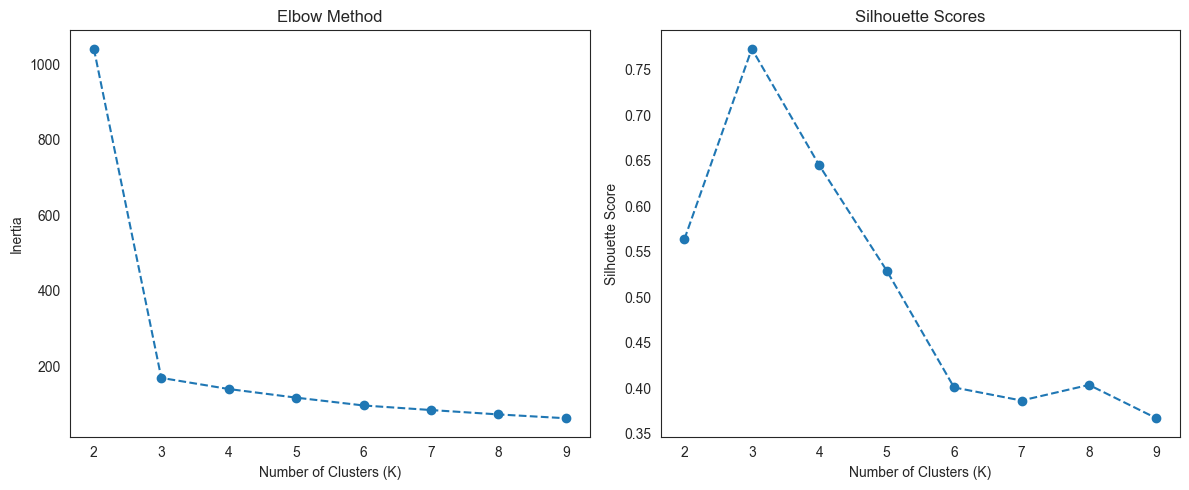

Optimal K by Elbow Method: 2
Optimal K by Silhouette Method: 3


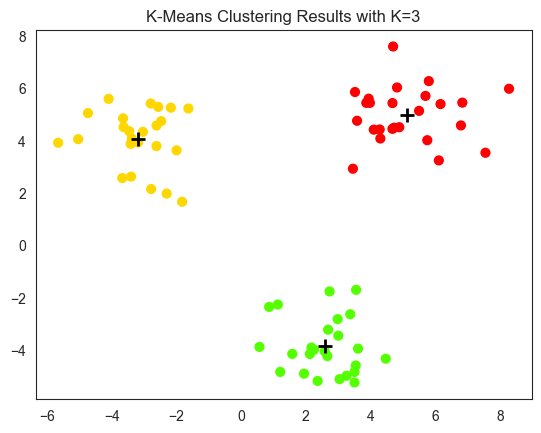

Cluster sizes:
2    25
1    25
0    25
Name: count, dtype: int64
Cluster centers:
[[ 5.11856384  4.98170966]
 [-3.18288421  4.04740762]
 [ 2.5872452  -3.86673314]]
Inertia: 169.2913640653612
=== Analysis for 4 Clusters ===


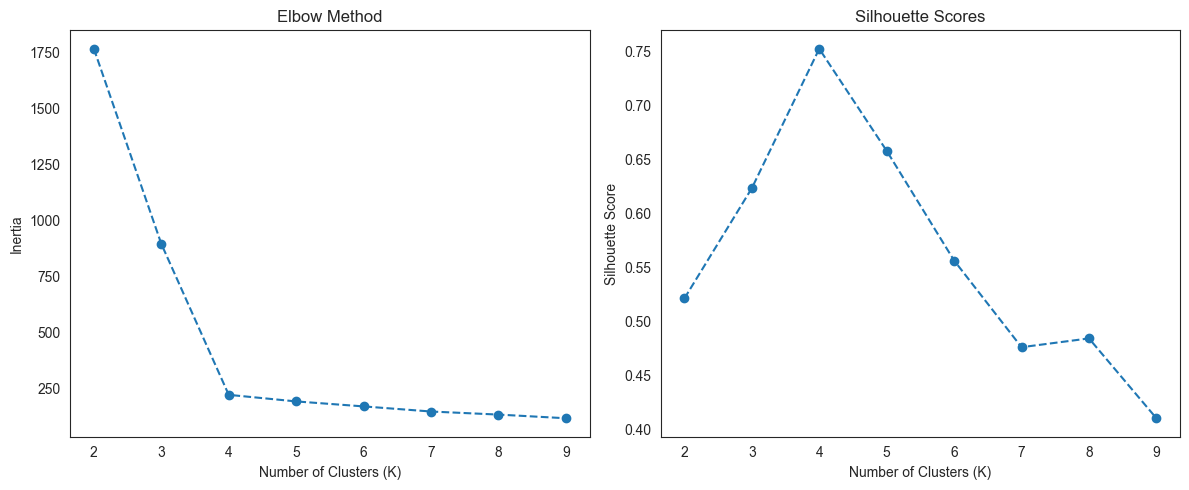

Optimal K by Elbow Method: 2
Optimal K by Silhouette Method: 4


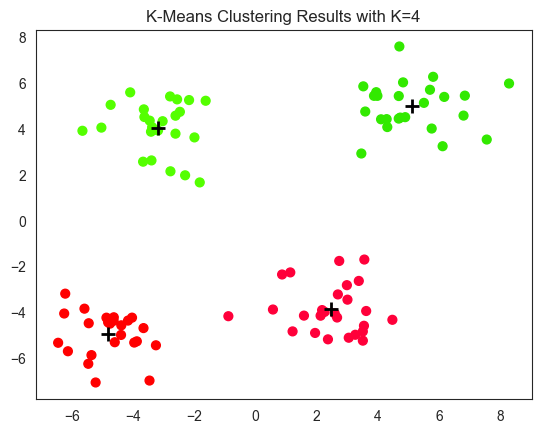

Cluster sizes:
2    26
3    25
1    25
0    24
Name: count, dtype: int64
Cluster centers:
[[-4.82267753 -4.9528448 ]
 [ 5.11856384  4.98170966]
 [ 2.45345471 -3.87873876]
 [-3.18288421  4.04740762]]
Inertia: 220.7379036626396


In [37]:
# Step 3: Visualize clustering results
def visualize_kmeans(X, K):
    km = KMeans(n_clusters=K, n_init=20, random_state=4)
    km.fit(X)

    f, ax2 = plt.subplots()
    ax2.scatter(X[:, 0], X[:, 1], s=40, c=km.labels_, cmap=plt.cm.prism)
    ax2.set_title(f'K-Means Clustering Results with K={K}')
    ax2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
                marker='+', s=100, c='k', linewidth=2)
    plt.show()

    print("Cluster sizes:")
    print(pd.Series(km.labels_).value_counts())
    print("Cluster centers:")
    print(km.cluster_centers_)
    print("Inertia:", km.inertia_)

# Run the workflow for 3 clusters
print("=== Analysis for 3 Clusters ===")
X_3 = generate_data_3_clusters()
range_K = range(2, 10)
optimal_K_3_inertia, optimal_K_3_silhouette = analyze_kmeans(X_3, range_K)
visualize_kmeans(X_3, optimal_K_3_silhouette)

# Run the workflow for 4 clusters
print("=== Analysis for 4 Clusters ===")
X_4 = generate_data_4_clusters()
optimal_K_4_inertia, optimal_K_4_silhouette = analyze_kmeans(X_4, range_K)
visualize_kmeans(X_4, optimal_K_4_silhouette)


=== Analysis for 3 Clusters ===


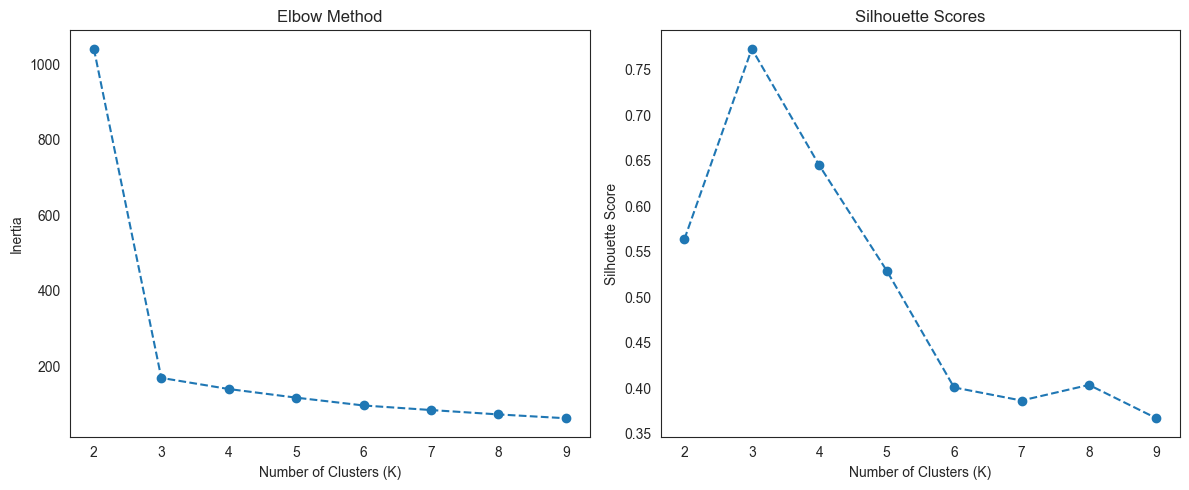

Optimal K by Elbow Method: 2
Optimal K by Silhouette Method: 3


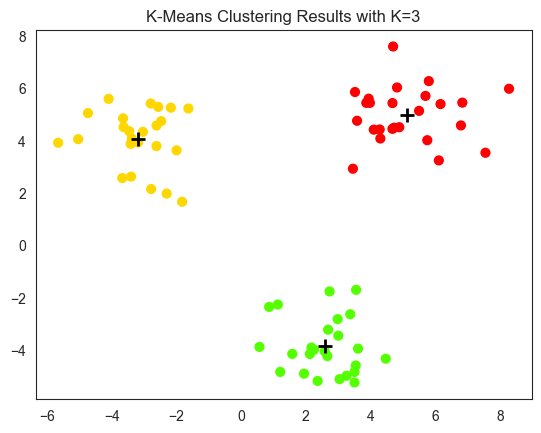

Cluster sizes:
2    25
1    25
0    25
Name: count, dtype: int64
Cluster centers:
[[ 5.11856384  4.98170966]
 [-3.18288421  4.04740762]
 [ 2.5872452  -3.86673314]]
Inertia: 169.2913640653612
=== Analysis for 4 Clusters ===


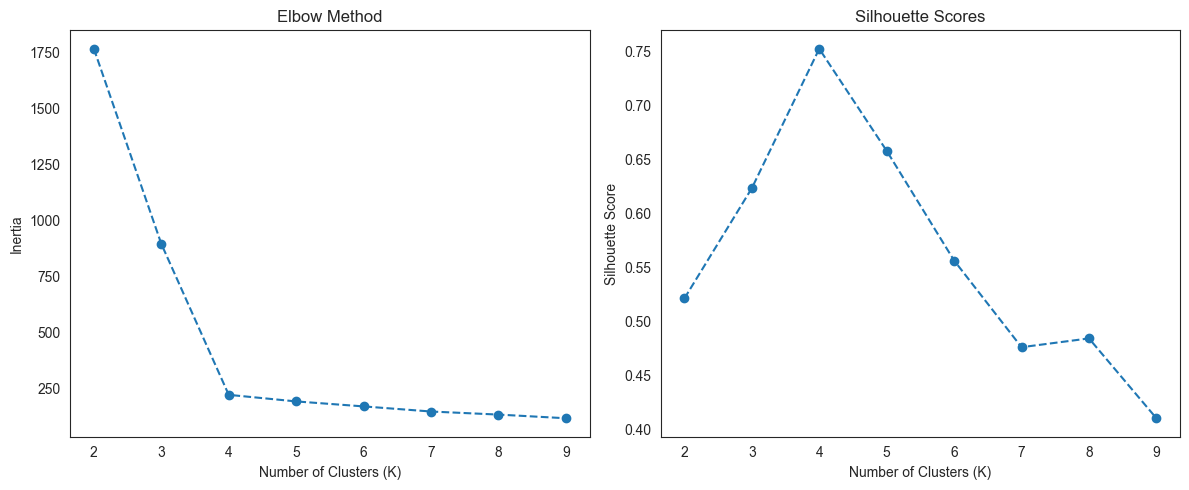

Optimal K by Elbow Method: 2
Optimal K by Silhouette Method: 4


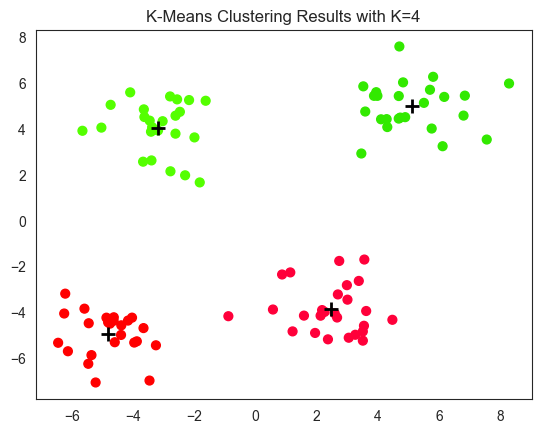

Cluster sizes:
2    26
3    25
1    25
0    24
Name: count, dtype: int64
Cluster centers:
[[-4.82267753 -4.9528448 ]
 [ 5.11856384  4.98170966]
 [ 2.45345471 -3.87873876]
 [-3.18288421  4.04740762]]
Inertia: 220.7379036626396


In [ ]:
# Step 3: Visualize clustering results
def visualize_kmeans(X, K):
    km = KMeans(n_clusters=K, n_init=20, random_state=4)
    km.fit(X)

    f, ax2 = plt.subplots()
    ax2.scatter(X[:, 0], X[:, 1], s=40, c=km.labels_, cmap=plt.cm.prism)
    ax2.set_title(f'K-Means Clustering Results with K={K}')
    ax2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
                marker='+', s=100, c='k', linewidth=2)
    plt.show()

    print("Cluster sizes:")
    print(pd.Series(km.labels_).value_counts())
    print("Cluster centers:")
    print(km.cluster_centers_)
    print("Inertia:", km.inertia_)

# Run the workflow for 3 clusters
print("=== Analysis for 3 Clusters ===")
X_3 = generate_data_3_clusters()
range_K = range(2, 10)
optimal_K_3_inertia, optimal_K_3_silhouette = analyze_kmeans(X_3, range_K)
visualize_kmeans(X_3, optimal_K_3_silhouette)

# Run the workflow for 4 clusters
print("=== Analysis for 4 Clusters ===")
X_4 = generate_data_4_clusters()
optimal_K_4_inertia, optimal_K_4_silhouette = analyze_kmeans(X_4, range_K)
visualize_kmeans(X_4, optimal_K_4_silhouette)


### Hierarchical Clustering

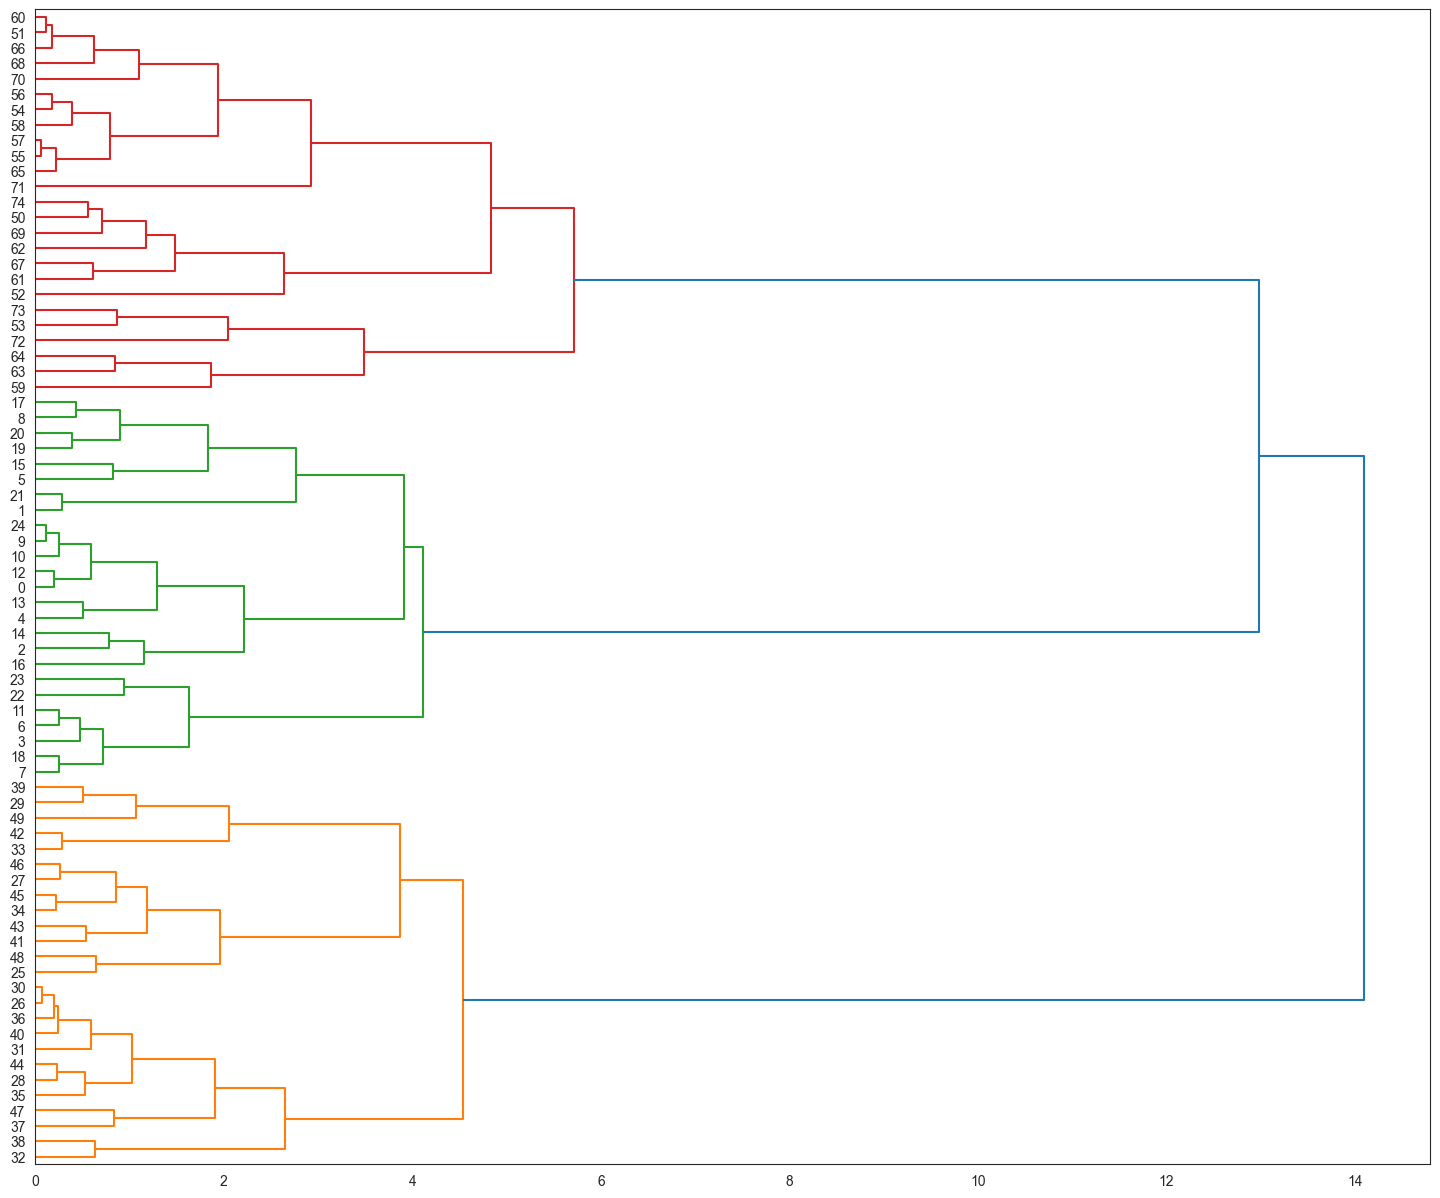

In [43]:
linkage=hierarchy.complete(X) #create hierarchical cluster using complete linkage
f,ax=plt.subplots(1,1,figsize=(18,15)) # prepare plot

cluster=hierarchy.dendrogram(linkage,orientation='right',leaf_font_size=10,ax=ax)

Text(0.5, 1.0, 'Hierarchical Clustering Results with K2')

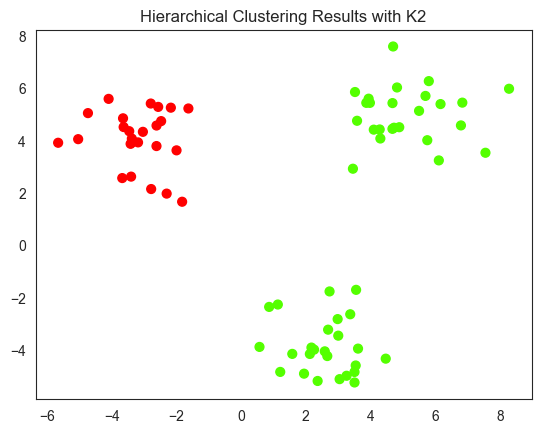

In [44]:
K=2
labels=hierarchy.fcluster(linkage,t=K,criterion="maxclust")
f,ax2=plt.subplots()
ax2.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.prism) 
ax2.set_title('Hierarchical Clustering Results with K'+str(K))

### Try
Plot the other type of linkage using on the random data X (used in the k-means)
    1. hierarchy.average(X) 
    1. hierarchy.single(X)
    

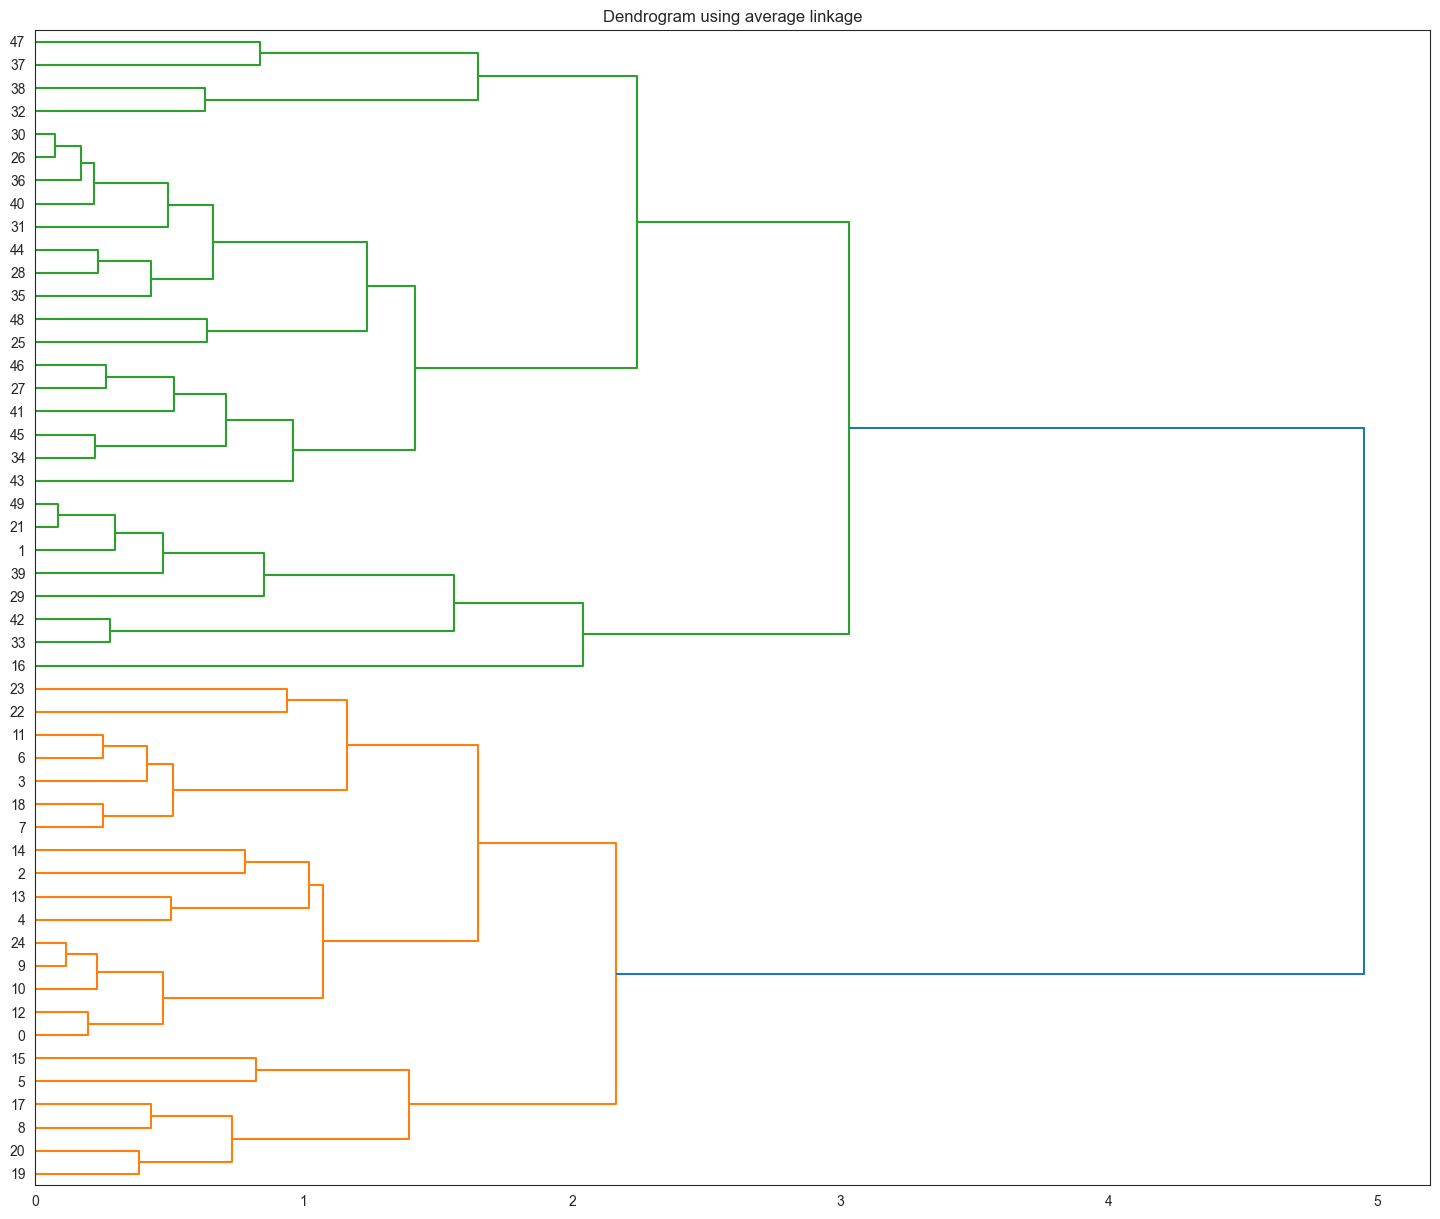

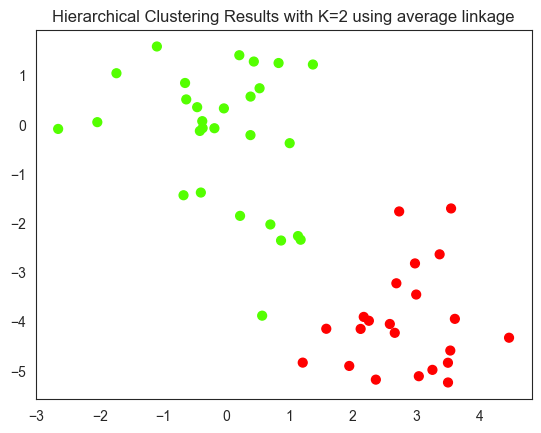

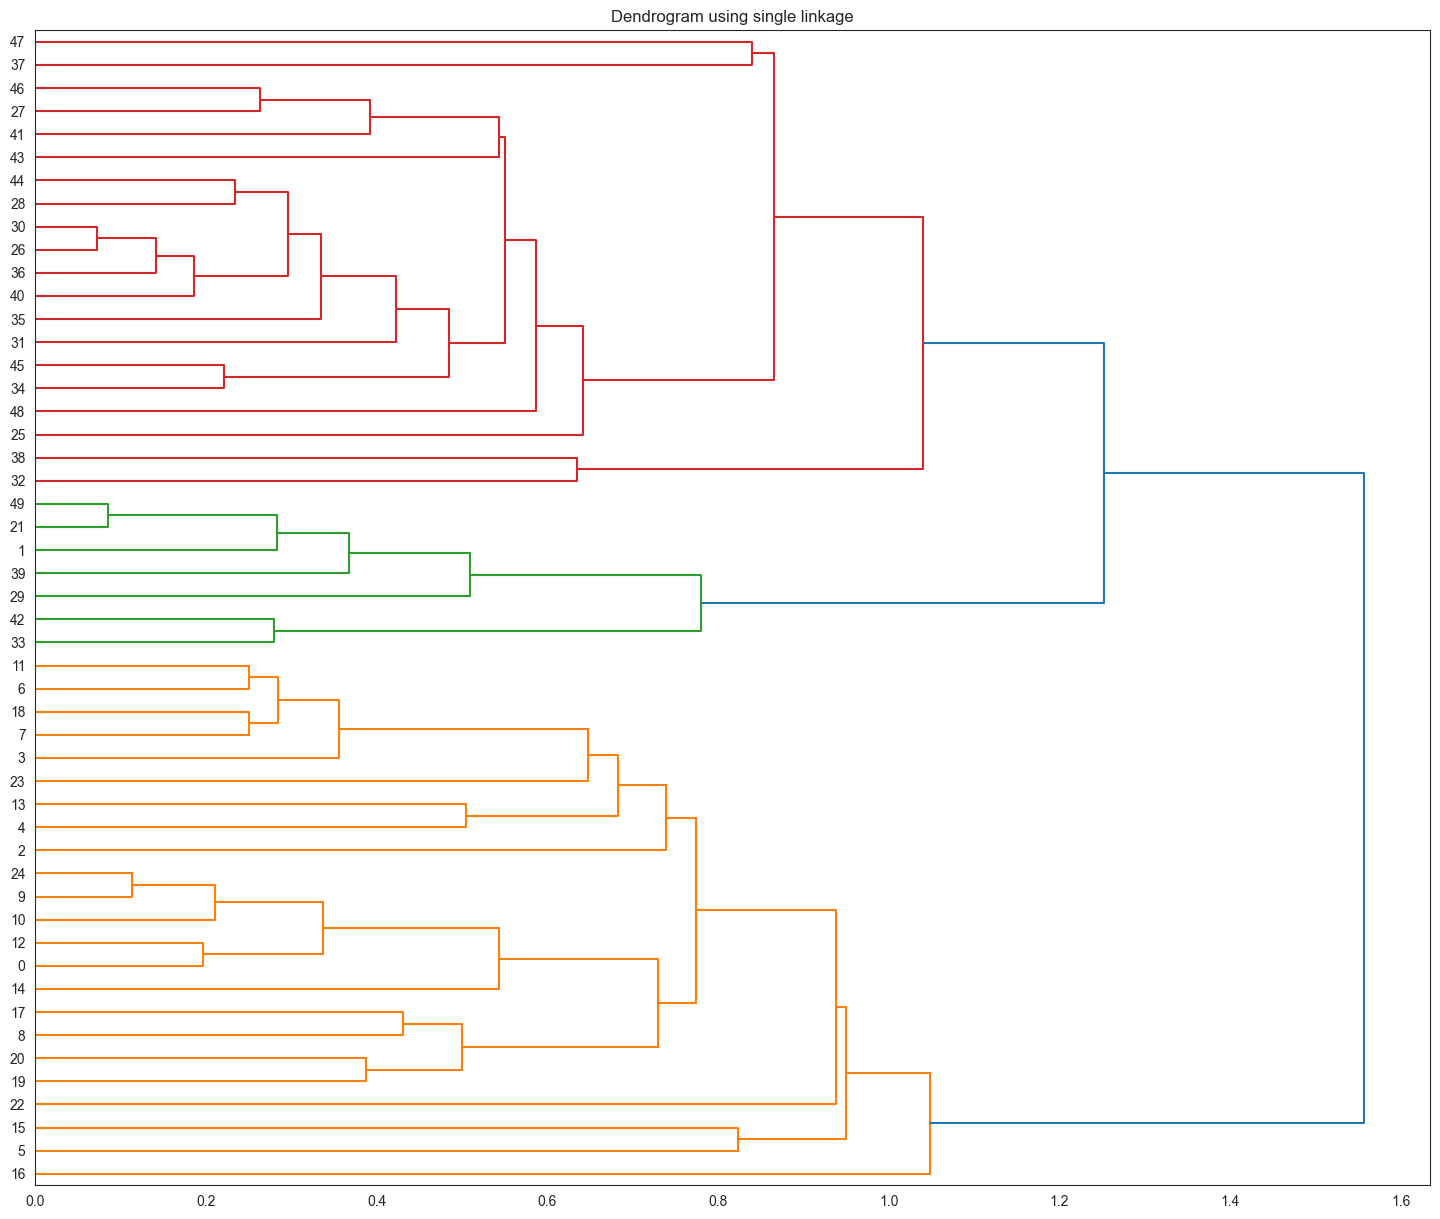

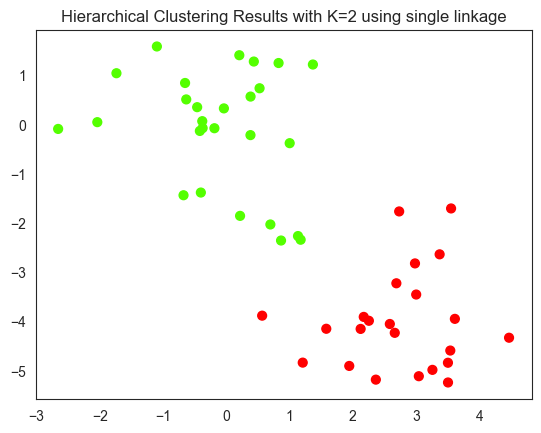

In [46]:
#Answer for Clustering 2 :
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.datasets import make_blobs

# Generate random data (same as used in K-means)
np.random.seed(2)
X = np.random.standard_normal((50, 2))  # random distribution 50 data points
# Create 2 clusters
X[:25, 0] = X[:25, 0] + 3  # shift by 3
X[:25, 1] = X[:25, 1] - 4  # shift by -4

# Function to plot hierarchical clustering results
def plot_hierarchical_clustering(X, linkage_method, K):
    linkage = hierarchy.linkage(X, method=linkage_method)  # create hierarchical cluster
    f, ax = plt.subplots(1, 1, figsize=(18, 15))  # prepare plot
    hierarchy.dendrogram(linkage, orientation='right', leaf_font_size=10, ax=ax)
    plt.title(f'Dendrogram using {linkage_method} linkage')
    plt.show()

    labels = hierarchy.fcluster(linkage, t=K, criterion="maxclust")
    f, ax2 = plt.subplots()
    ax2.scatter(X[:, 0], X[:, 1], s=40, c=labels, cmap=plt.cm.prism)
    ax2.set_title(f'Hierarchical Clustering Results with K={K} using {linkage_method} linkage')
    plt.show()

# Plot hierarchical clustering results using average linkage
plot_hierarchical_clustering(X, linkage_method='average', K=2)

# Plot hierarchical clustering results using single linkage
plot_hierarchical_clustering(X, linkage_method='single', K=2)

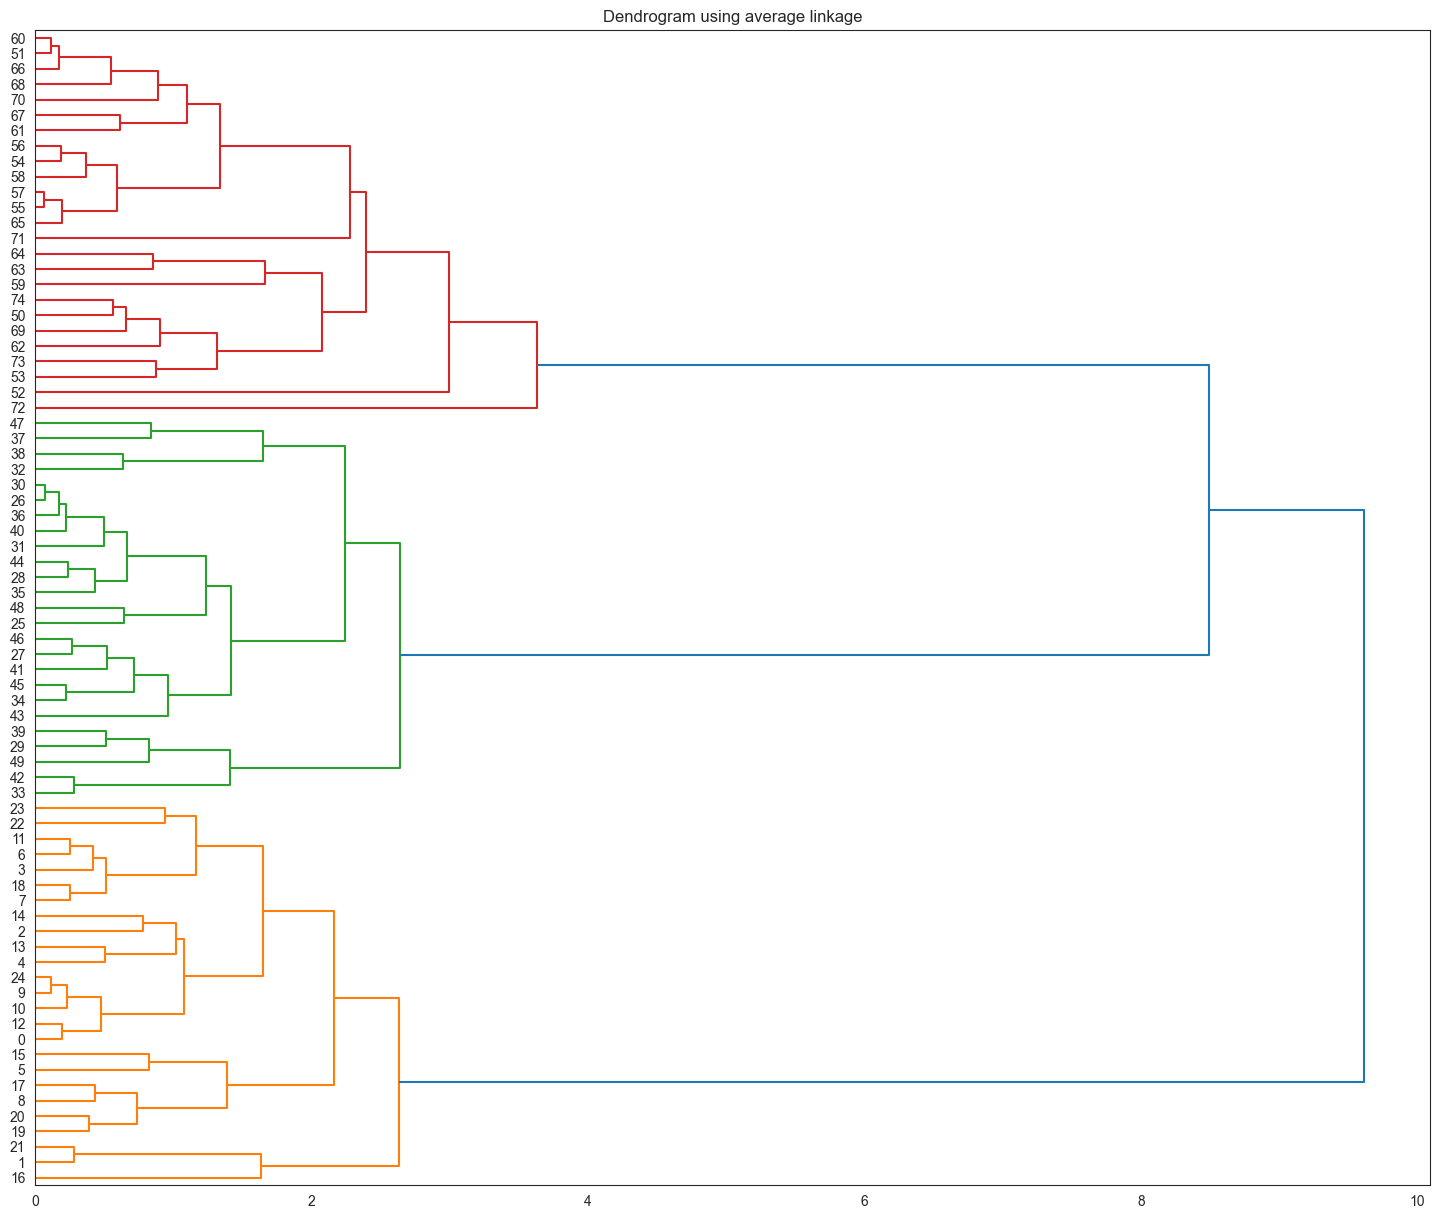

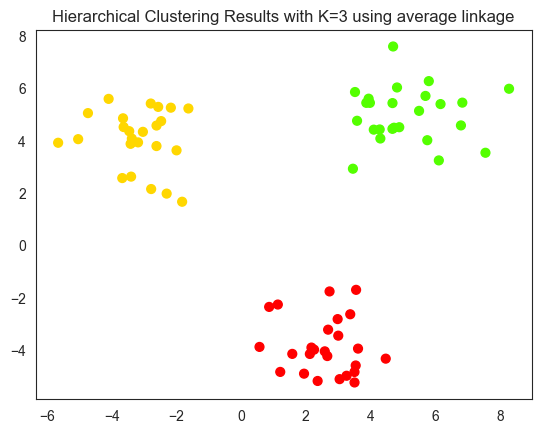

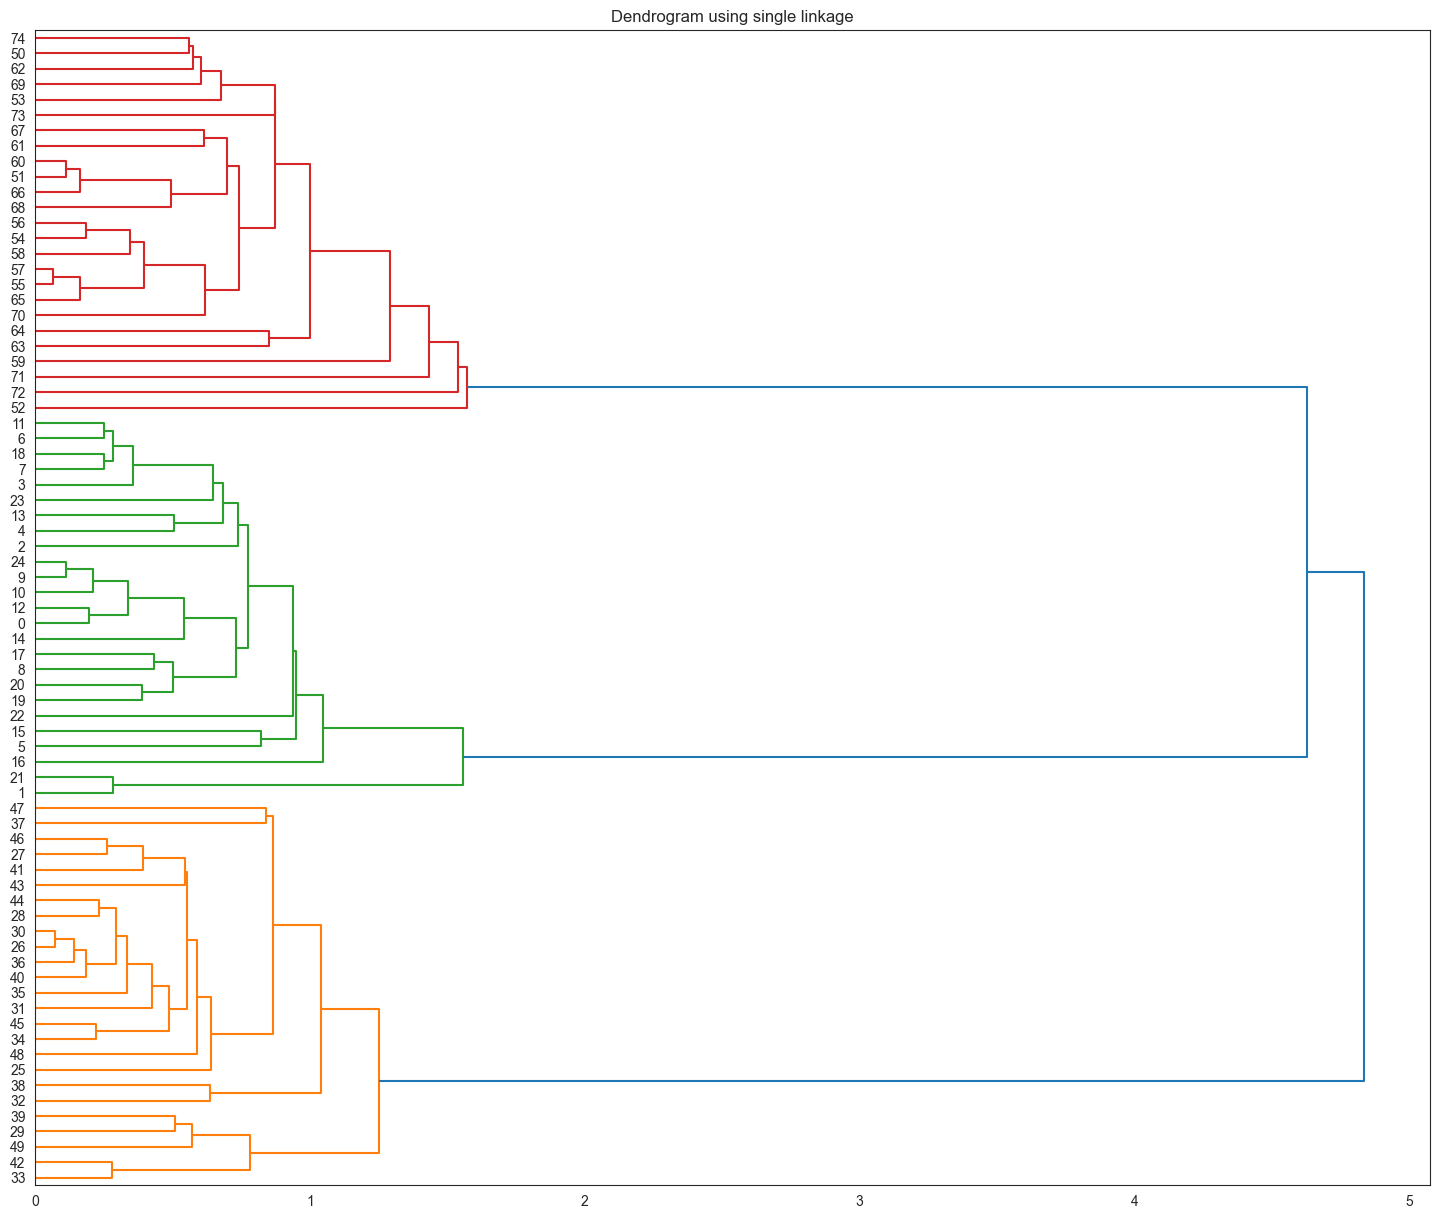

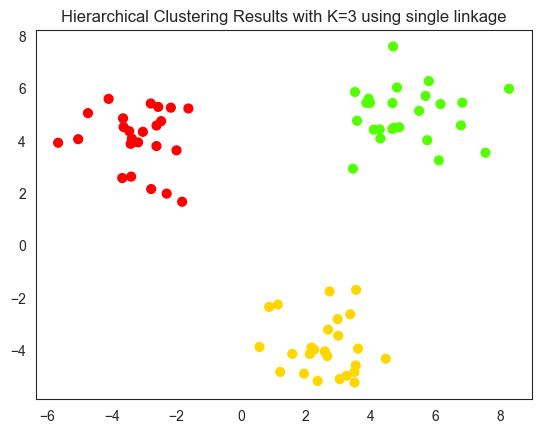

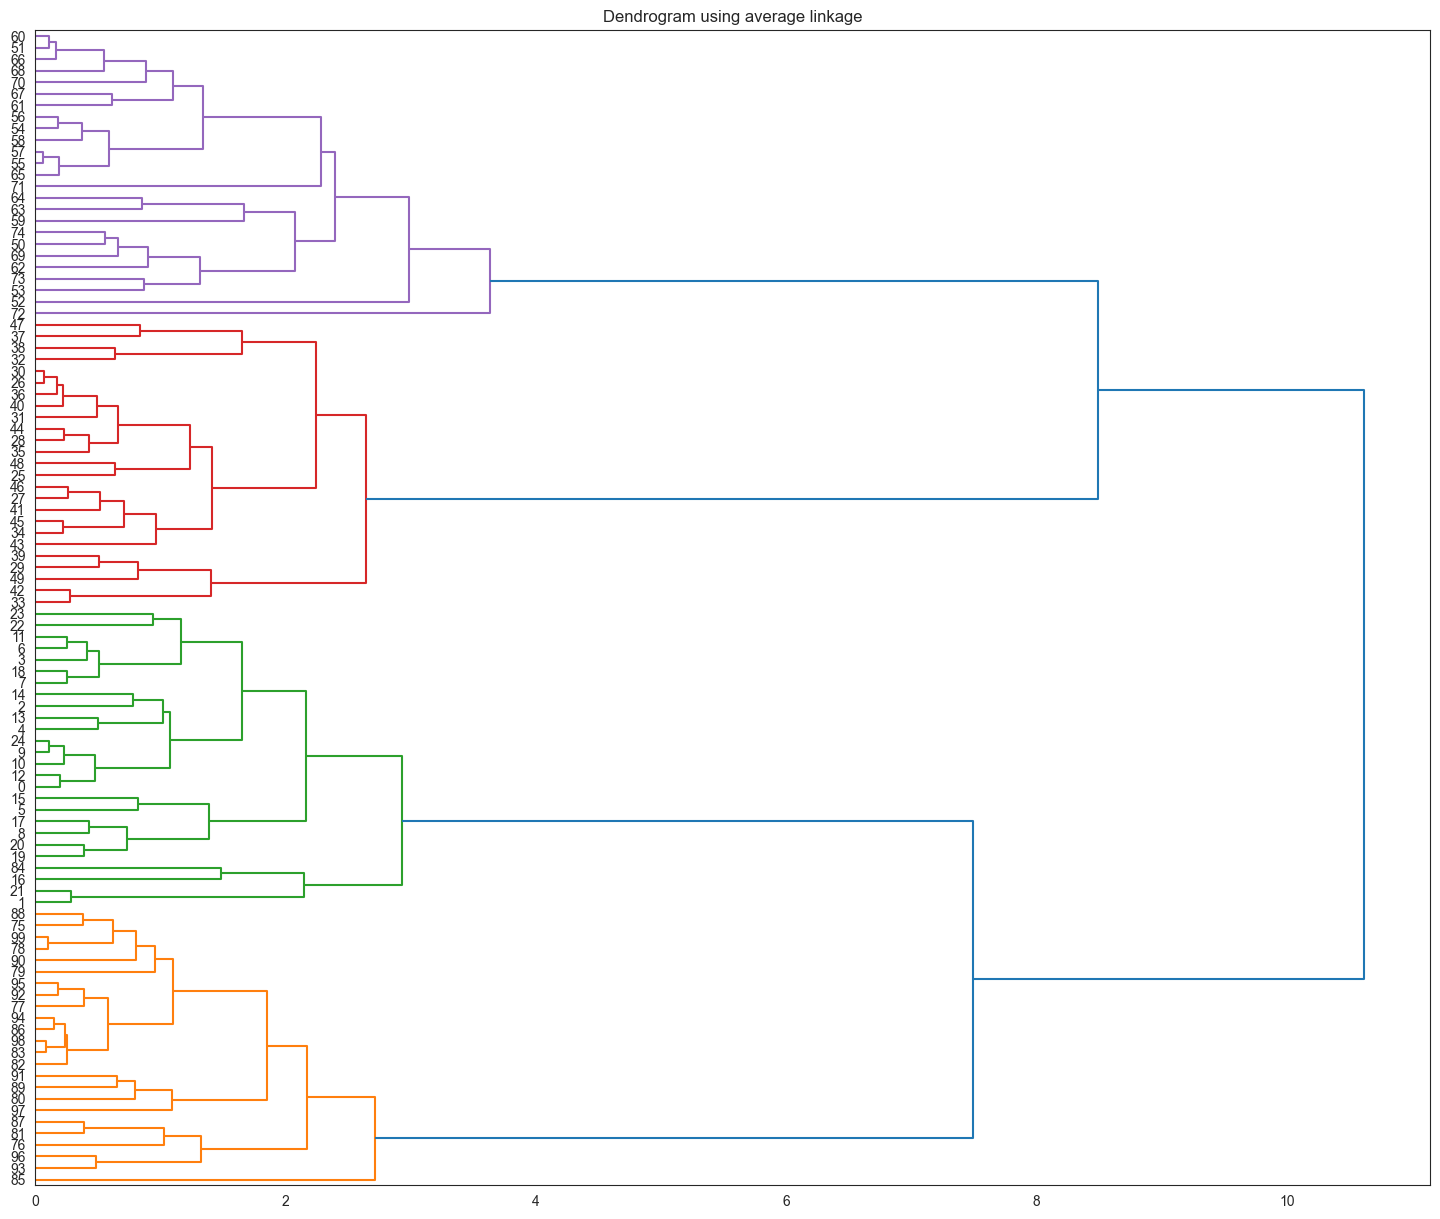

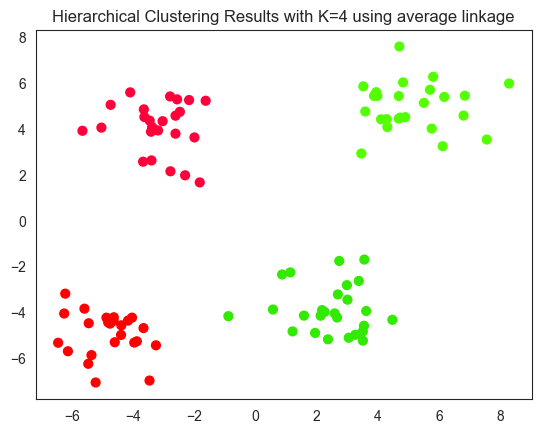

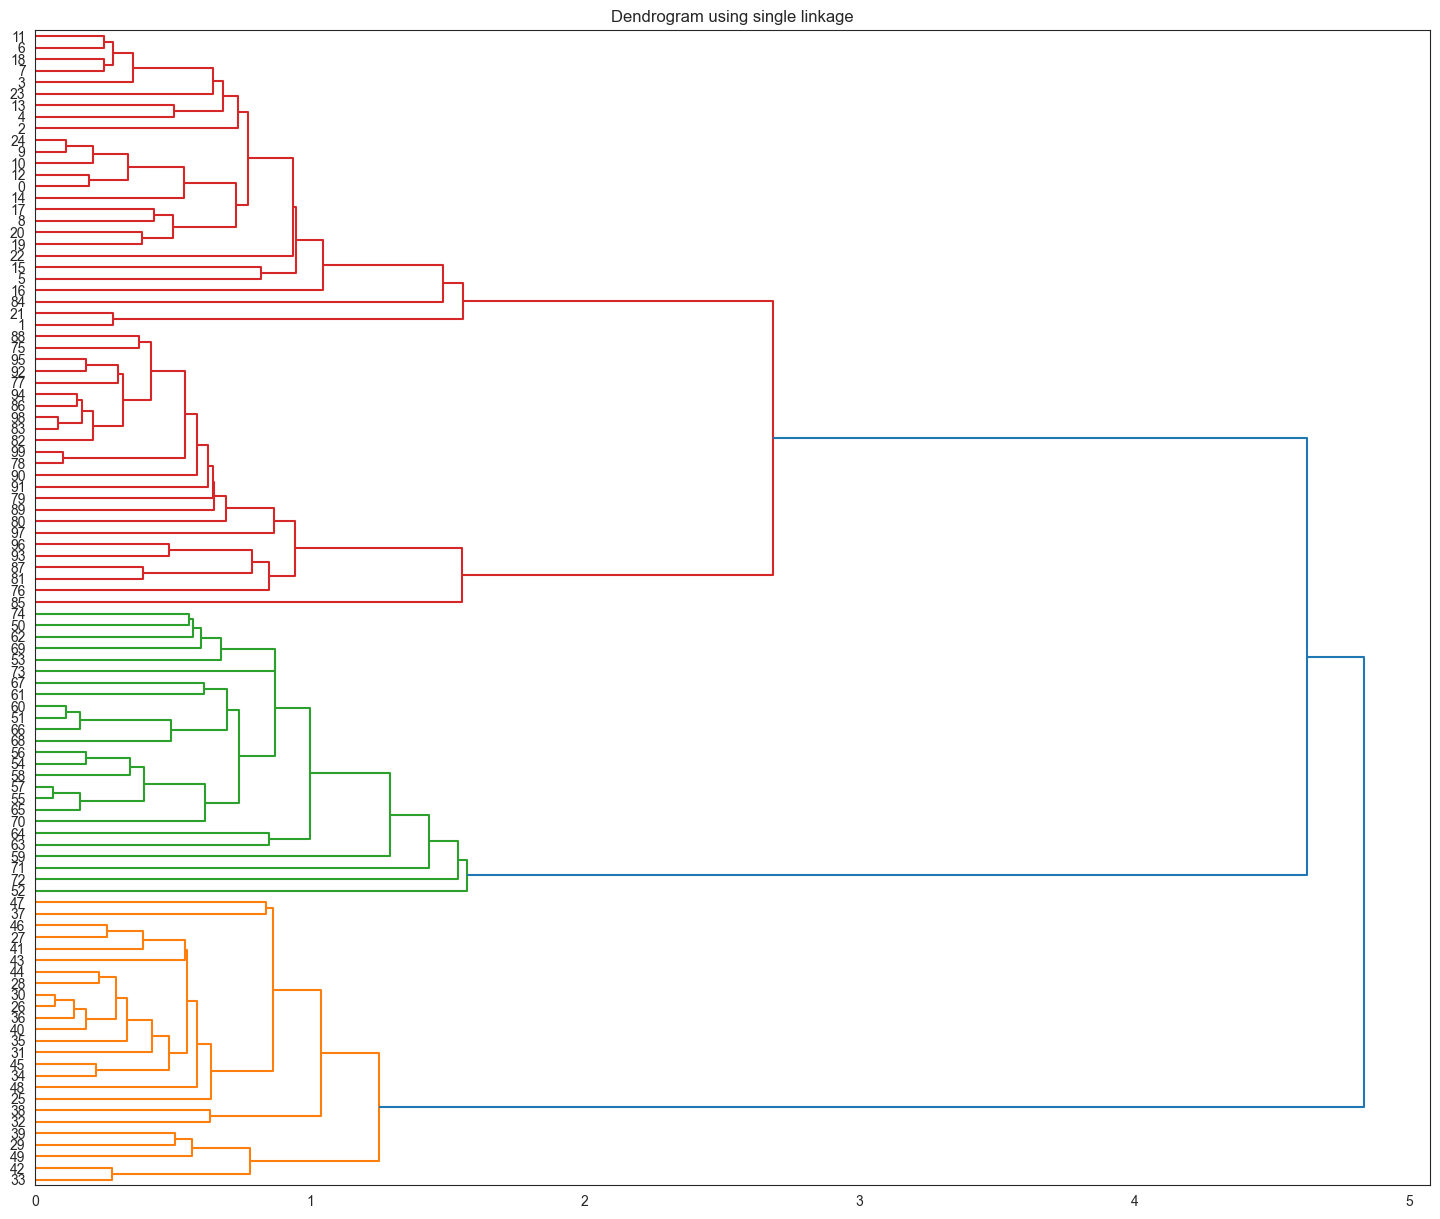

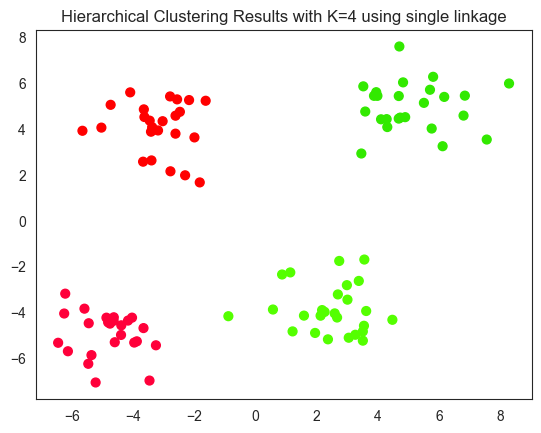

In [47]:
#For clustering 3 and 4 :
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.datasets import make_blobs

# Generate data with 3 clusters
def generate_data_3_clusters():
    np.random.seed(2)
    X = np.random.standard_normal((75, 2))  # 75 data points for 3 clusters
    X[:25, 0] += 3
    X[:25, 1] -= 4
    X[25:50, 0] -= 3
    X[25:50, 1] += 4
    X[50:, 0] += 5
    X[50:, 1] += 5
    return X

# Generate data with 4 clusters
def generate_data_4_clusters():
    np.random.seed(2)
    X = np.random.standard_normal((100, 2))  # 100 data points for 4 clusters
    X[:25, 0] += 3
    X[:25, 1] -= 4
    X[25:50, 0] -= 3
    X[25:50, 1] += 4
    X[50:75, 0] += 5
    X[50:75, 1] += 5
    X[75:, 0] -= 5
    X[75:, 1] -= 5
    return X

# Generate data
X_3 = generate_data_3_clusters()
X_4 = generate_data_4_clusters()

# Function to plot hierarchical clustering results
def plot_hierarchical_clustering(X, linkage_method, K):
    linkage = hierarchy.linkage(X, method=linkage_method)  # create hierarchical cluster
    f, ax = plt.subplots(1, 1, figsize=(18, 15))  # prepare plot
    hierarchy.dendrogram(linkage, orientation='right', leaf_font_size=10, ax=ax)
    plt.title(f'Dendrogram using {linkage_method} linkage')
    plt.show()

    labels = hierarchy.fcluster(linkage, t=K, criterion="maxclust")
    f, ax2 = plt.subplots()
    ax2.scatter(X[:, 0], X[:, 1], s=40, c=labels, cmap=plt.cm.prism)
    ax2.set_title(f'Hierarchical Clustering Results with K={K} using {linkage_method} linkage')
    plt.show()

# Plot hierarchical clustering results using average linkage for X_3
plot_hierarchical_clustering(X_3, linkage_method='average', K=3)

# Plot hierarchical clustering results using single linkage for X_3
plot_hierarchical_clustering(X_3, linkage_method='single', K=3)

# Plot hierarchical clustering results using average linkage for X_4
plot_hierarchical_clustering(X_4, linkage_method='average', K=4)

# Plot hierarchical clustering results using single linkage for X_4
plot_hierarchical_clustering(X_4, linkage_method='single', K=4)

### Density Clustering DBSCAN


In [48]:
db = DBSCAN(eps=1.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # create array same size as db.labels_ with zeros
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(db.core_sample_indices_)
print(labels)
# Number of clusters in labels, ignoring noise if present. -1 is noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

[ 0  4  6  7  8  9 10 11 12 13 14 18 19 20 23 24 26 27 28 30 31 34 35 36
 40 44 45 46 48]
[ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1 -1]
Estimated number of clusters: 2


### Hierarchical Clustering

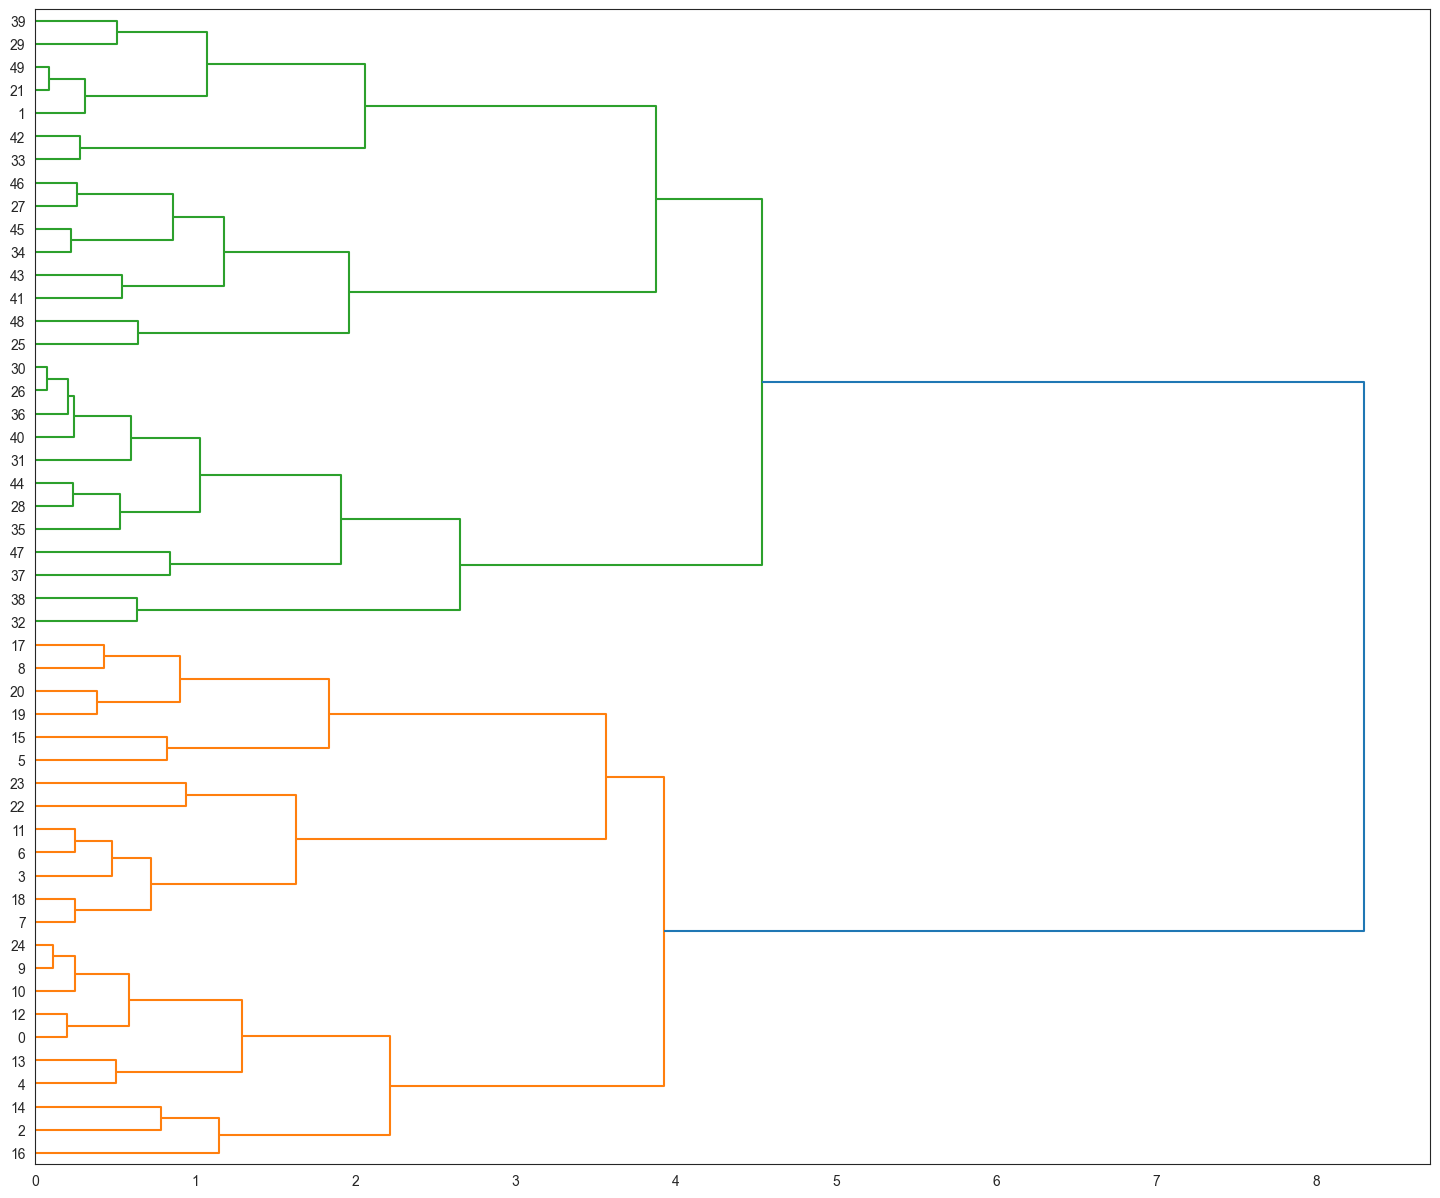

In [49]:
linkage=hierarchy.complete(X) #create hierarchical cluster using complete linkage
f,ax=plt.subplots(1,1,figsize=(18,15)) # prepare plot

cluster=hierarchy.dendrogram(linkage,orientation='right',leaf_font_size=10,ax=ax)

Text(0.5, 1.0, 'Hierarchical Clustering Results with K2')

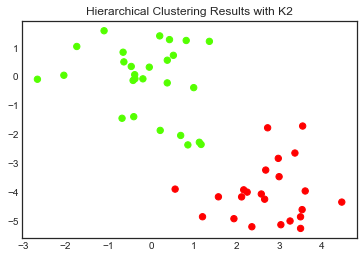

In [5]:
K=2
labels=hierarchy.fcluster(linkage,t=K,criterion="maxclust")
f,ax2=plt.subplots()
ax2.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.prism) 
ax2.set_title('Hierarchical Clustering Results with K'+str(K))

### Try
Plot the other type of linkage using on the random data X (used in the k-means)
    1. hierarchy.average(X) 
    1. hierarchy.single(X)
    

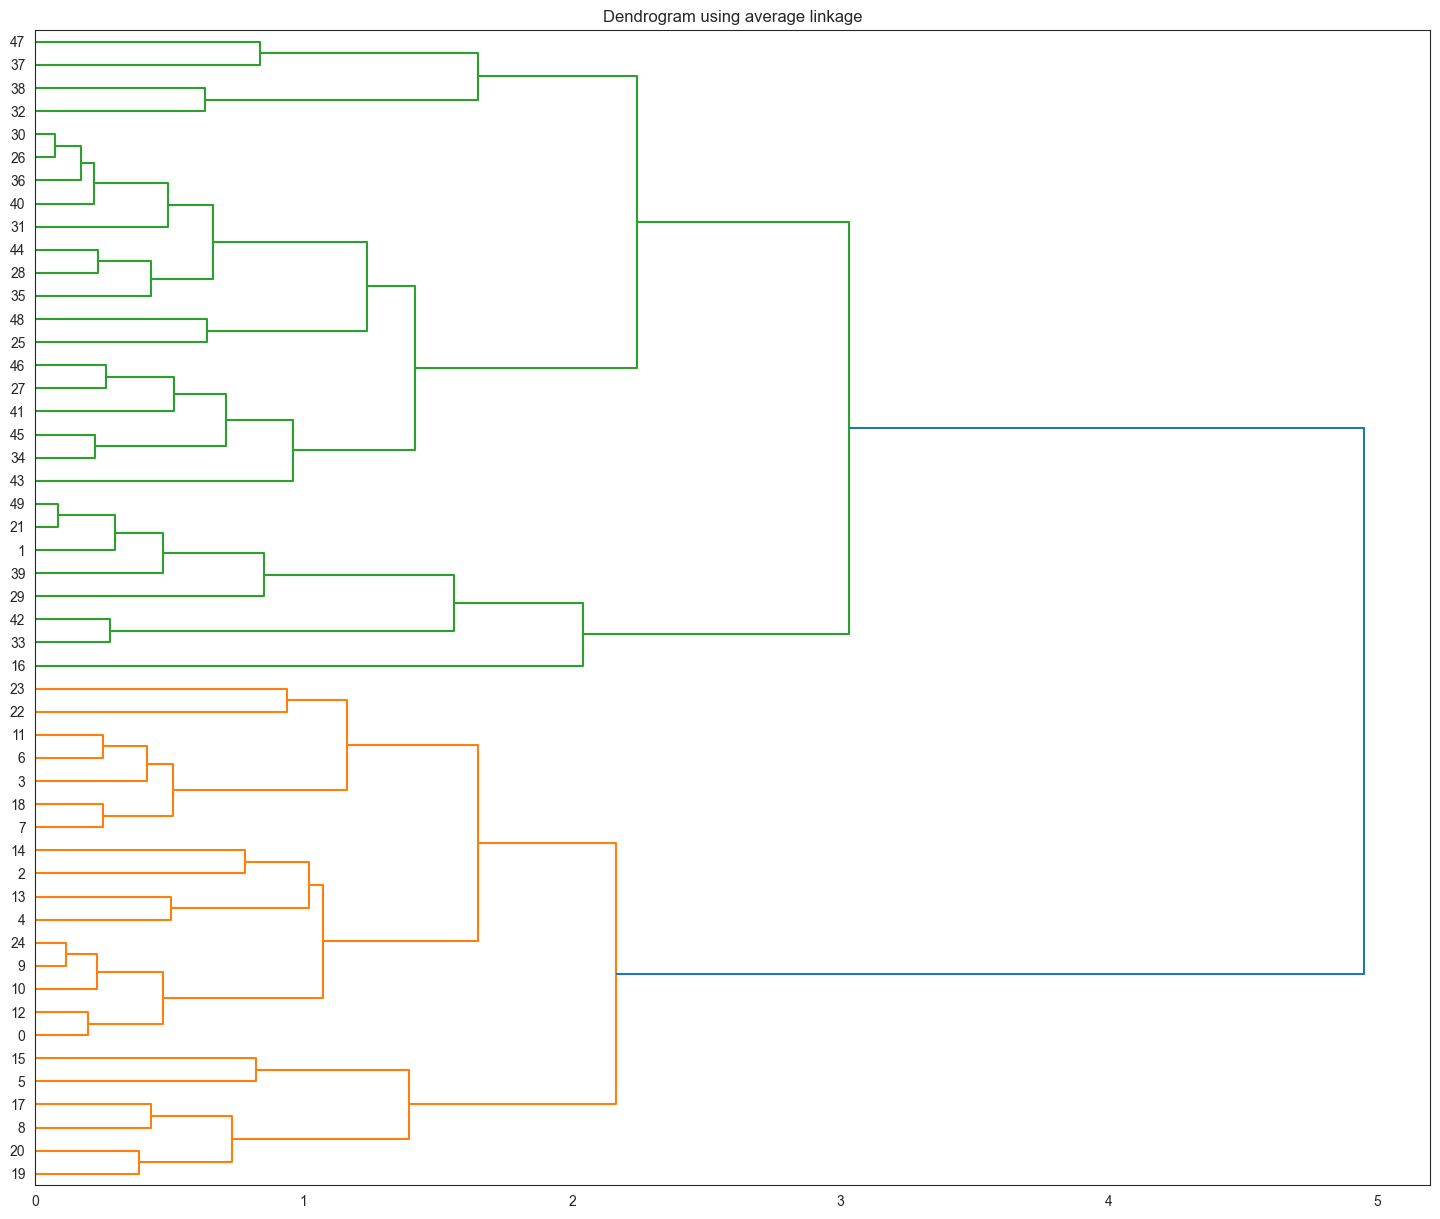

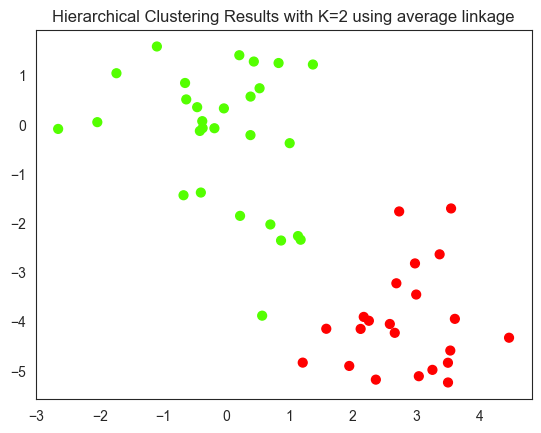

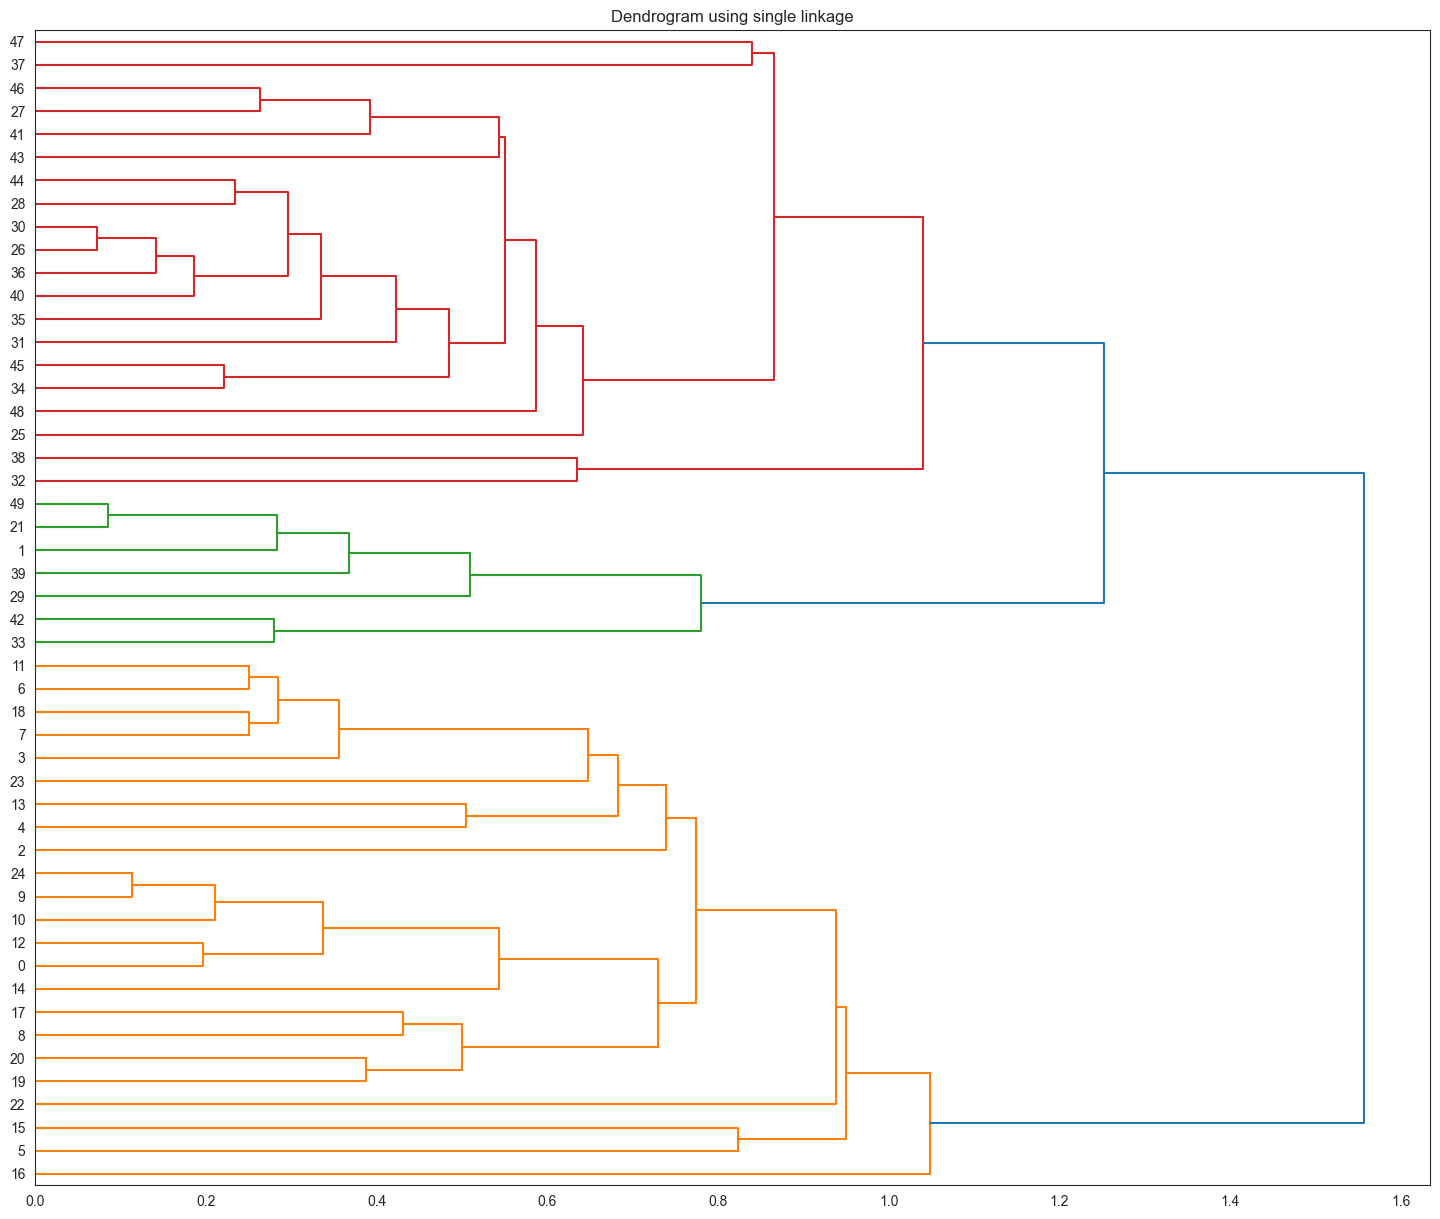

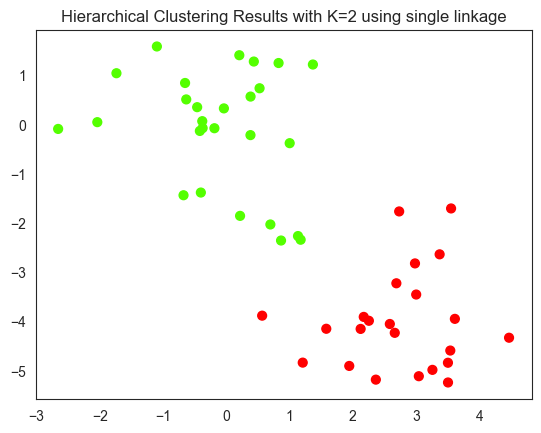

In [50]:
#Answer for Clustering 2 :
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.datasets import make_blobs

# Generate random data (same as used in K-means)
np.random.seed(2)
X = np.random.standard_normal((50, 2))  # random distribution 50 data points
# Create 2 clusters
X[:25, 0] = X[:25, 0] + 3  # shift by 3
X[:25, 1] = X[:25, 1] - 4  # shift by -4

# Function to plot hierarchical clustering results
def plot_hierarchical_clustering(X, linkage_method, K):
    linkage = hierarchy.linkage(X, method=linkage_method)  # create hierarchical cluster
    f, ax = plt.subplots(1, 1, figsize=(18, 15))  # prepare plot
    hierarchy.dendrogram(linkage, orientation='right', leaf_font_size=10, ax=ax)
    plt.title(f'Dendrogram using {linkage_method} linkage')
    plt.show()

    labels = hierarchy.fcluster(linkage, t=K, criterion="maxclust")
    f, ax2 = plt.subplots()
    ax2.scatter(X[:, 0], X[:, 1], s=40, c=labels, cmap=plt.cm.prism)
    ax2.set_title(f'Hierarchical Clustering Results with K={K} using {linkage_method} linkage')
    plt.show()

# Plot hierarchical clustering results using average linkage
plot_hierarchical_clustering(X, linkage_method='average', K=2)

# Plot hierarchical clustering results using single linkage
plot_hierarchical_clustering(X, linkage_method='single', K=2)

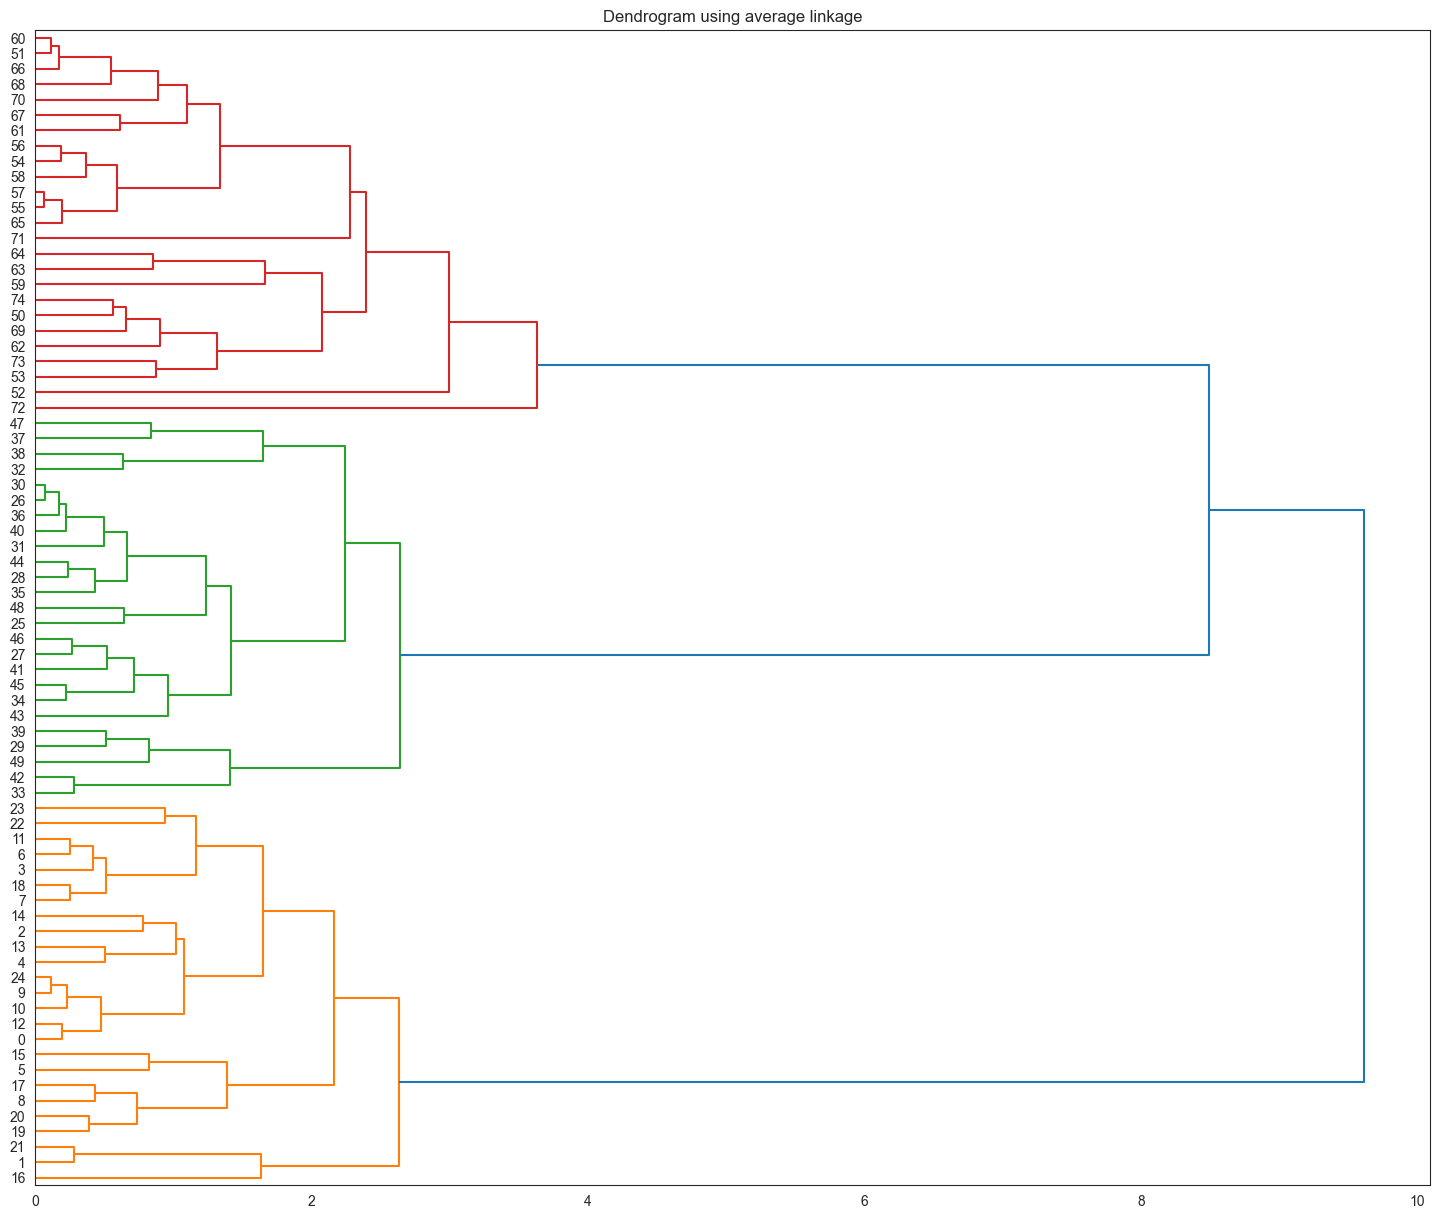

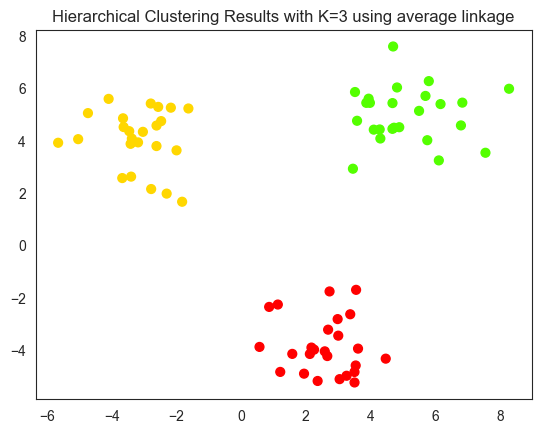

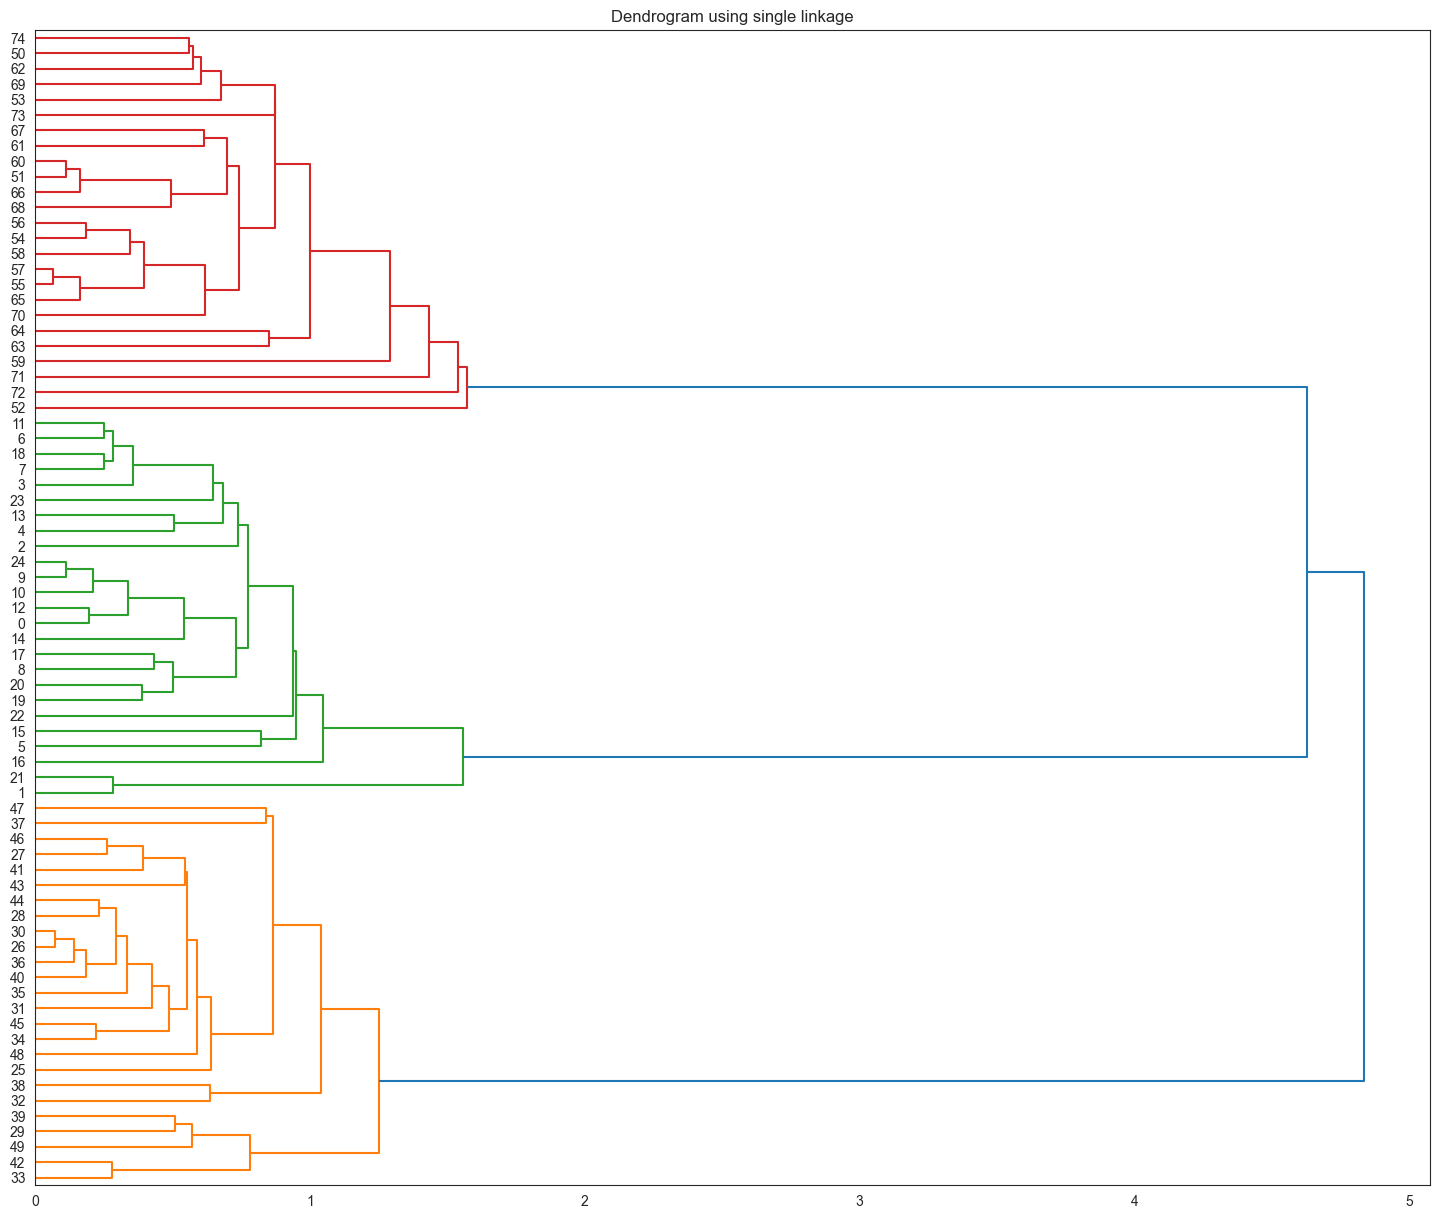

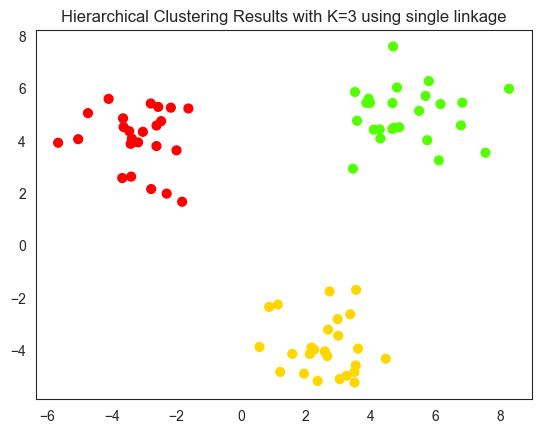

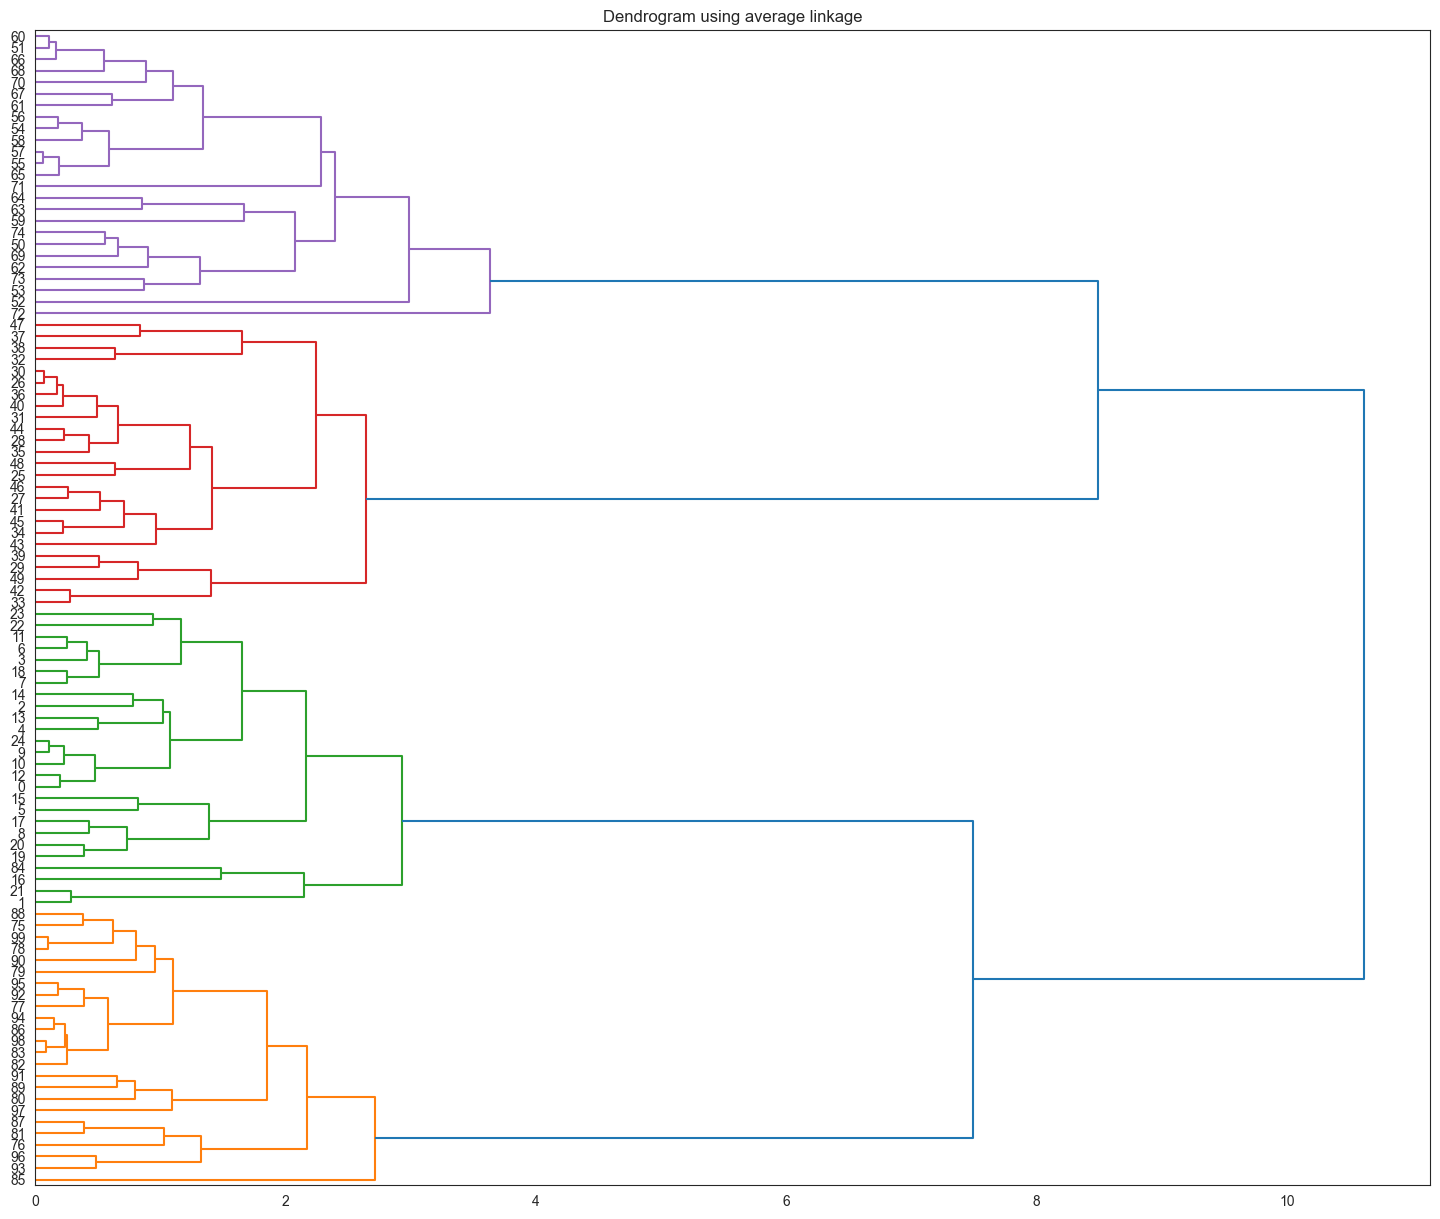

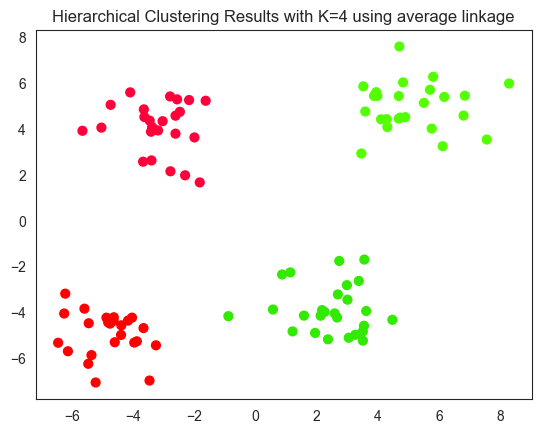

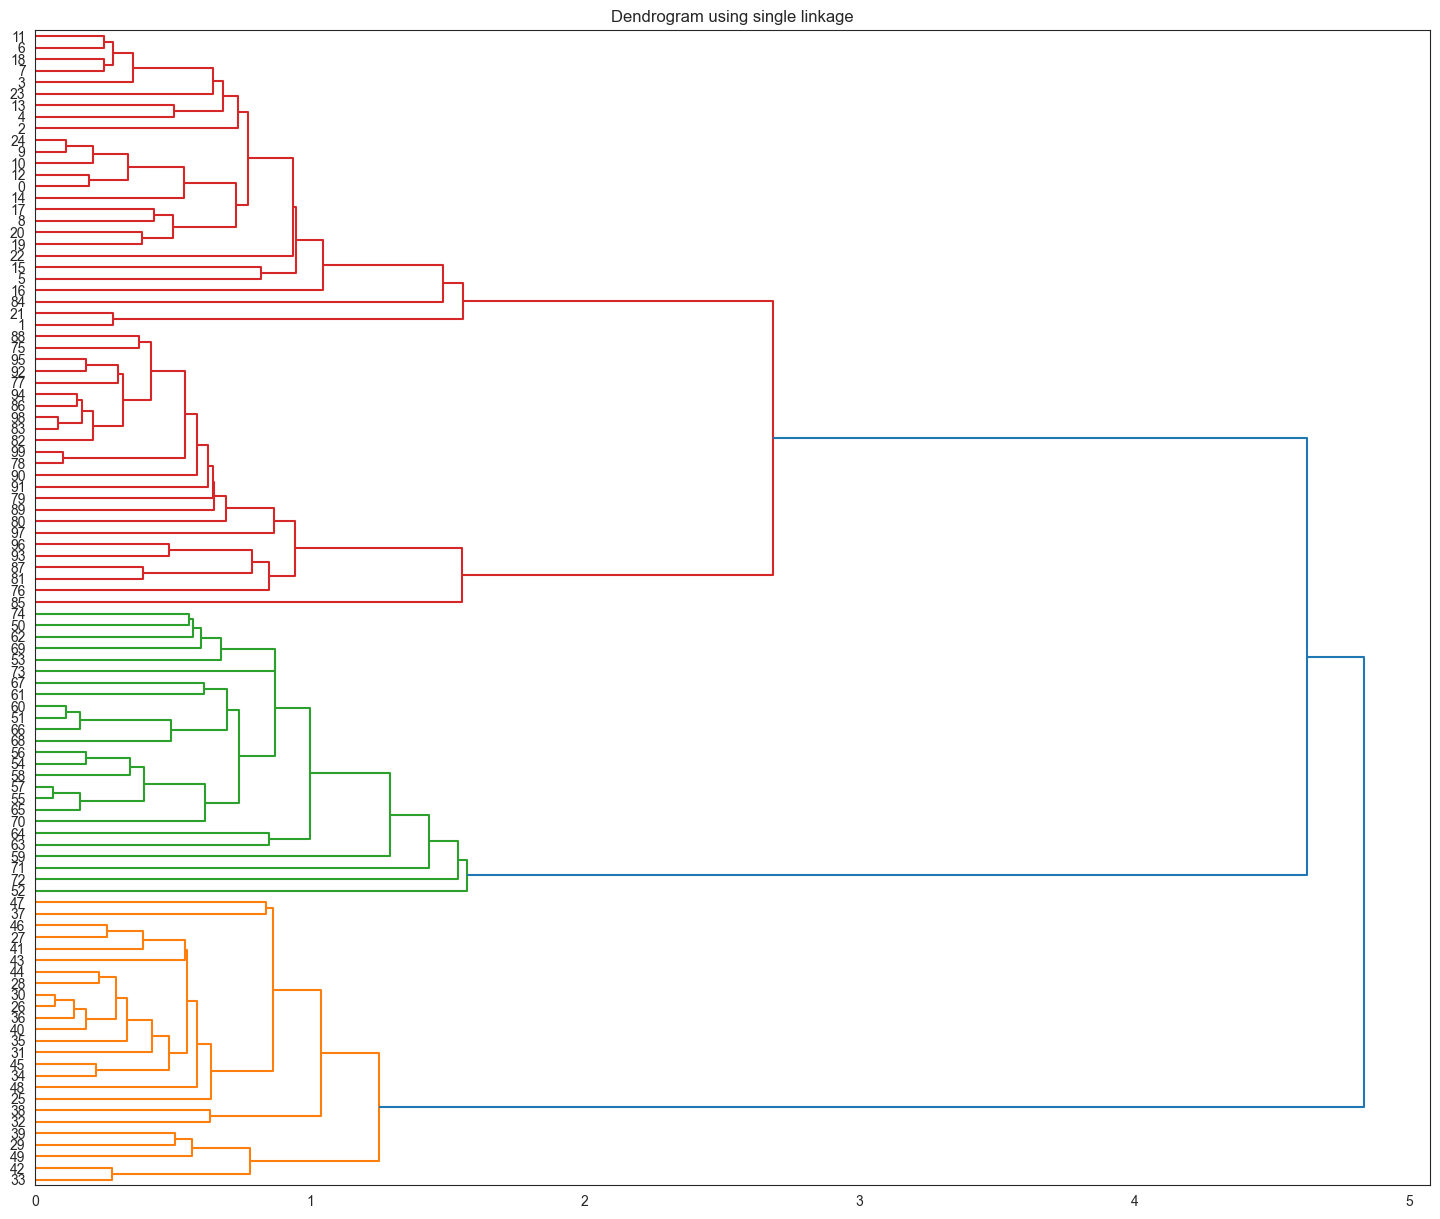

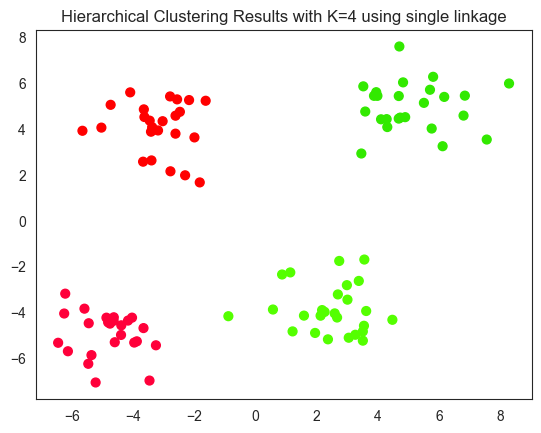

In [51]:
#For clustering 3 and 4 :
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.datasets import make_blobs

# Generate data with 3 clusters
def generate_data_3_clusters():
    np.random.seed(2)
    X = np.random.standard_normal((75, 2))  # 75 data points for 3 clusters
    X[:25, 0] += 3
    X[:25, 1] -= 4
    X[25:50, 0] -= 3
    X[25:50, 1] += 4
    X[50:, 0] += 5
    X[50:, 1] += 5
    return X

# Generate data with 4 clusters
def generate_data_4_clusters():
    np.random.seed(2)
    X = np.random.standard_normal((100, 2))  # 100 data points for 4 clusters
    X[:25, 0] += 3
    X[:25, 1] -= 4
    X[25:50, 0] -= 3
    X[25:50, 1] += 4
    X[50:75, 0] += 5
    X[50:75, 1] += 5
    X[75:, 0] -= 5
    X[75:, 1] -= 5
    return X

# Generate data
X_3 = generate_data_3_clusters()
X_4 = generate_data_4_clusters()

# Function to plot hierarchical clustering results
def plot_hierarchical_clustering(X, linkage_method, K):
    linkage = hierarchy.linkage(X, method=linkage_method)  # create hierarchical cluster
    f, ax = plt.subplots(1, 1, figsize=(18, 15))  # prepare plot
    hierarchy.dendrogram(linkage, orientation='right', leaf_font_size=10, ax=ax)
    plt.title(f'Dendrogram using {linkage_method} linkage')
    plt.show()

    labels = hierarchy.fcluster(linkage, t=K, criterion="maxclust")
    f, ax2 = plt.subplots()
    ax2.scatter(X[:, 0], X[:, 1], s=40, c=labels, cmap=plt.cm.prism)
    ax2.set_title(f'Hierarchical Clustering Results with K={K} using {linkage_method} linkage')
    plt.show()

# Plot hierarchical clustering results using average linkage for X_3
plot_hierarchical_clustering(X_3, linkage_method='average', K=3)

# Plot hierarchical clustering results using single linkage for X_3
plot_hierarchical_clustering(X_3, linkage_method='single', K=3)

# Plot hierarchical clustering results using average linkage for X_4
plot_hierarchical_clustering(X_4, linkage_method='average', K=4)

# Plot hierarchical clustering results using single linkage for X_4
plot_hierarchical_clustering(X_4, linkage_method='single', K=4)

### Density Clustering DBSCAN


In [12]:
db = DBSCAN(eps=1.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # create array same size as db.labels_ with zeros
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(db.core_sample_indices_)
print(labels)
# Number of clusters in labels, ignoring noise if present. -1 is noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

[ 0  4  6  7  8  9 10 11 12 13 14 18 19 20 23 24 26 27 28 30 31 34 35 36
 40 44 45 46 48]
[ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1 -1]
Estimated number of clusters: 2


In [52]:
#From Sci-kit Learn 
#Plot samples and clusters
def plot_dbscan (X,labels, core_samples_mask):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
        # White used for noise.
            col = [0, 1,1,1]
    
        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
                 


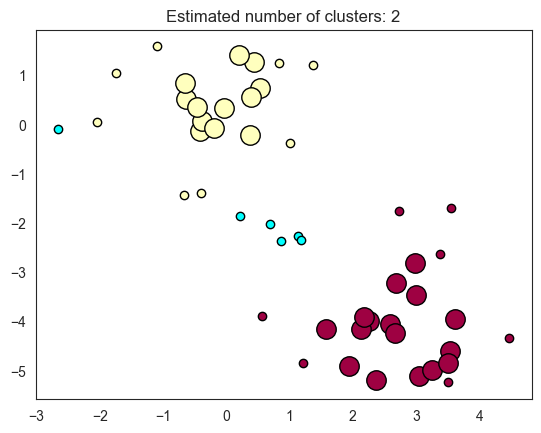

In [53]:
plot_dbscan(X, labels, core_samples_mask)

### Noisy Circle dataset

In [59]:
from sklearn import datasets
n_samples = 1500
X,y= datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
X = StandardScaler().fit_transform(X)

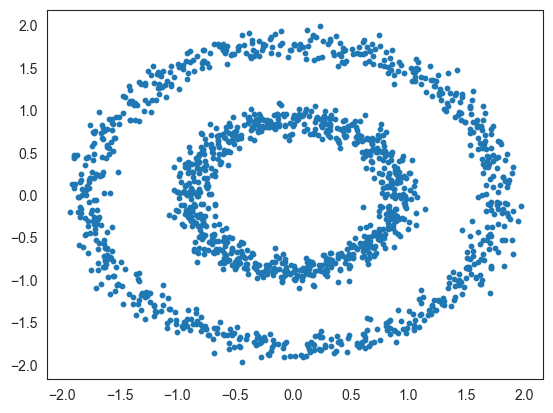

In [60]:
plt.scatter(X[:, 0], X[:, 1], s=10)

### Question (Total 40 marks)
Cluster the noisy circle data (above) with these clustering algorithm:
1. K-Means (select the best K). Select the K using by inertia and silhouette method. (20 marks)
1. DBSCAN(select best eps)  (10 marks)


 
Comment on the capabilities of each clustering algorithm (10 marks)

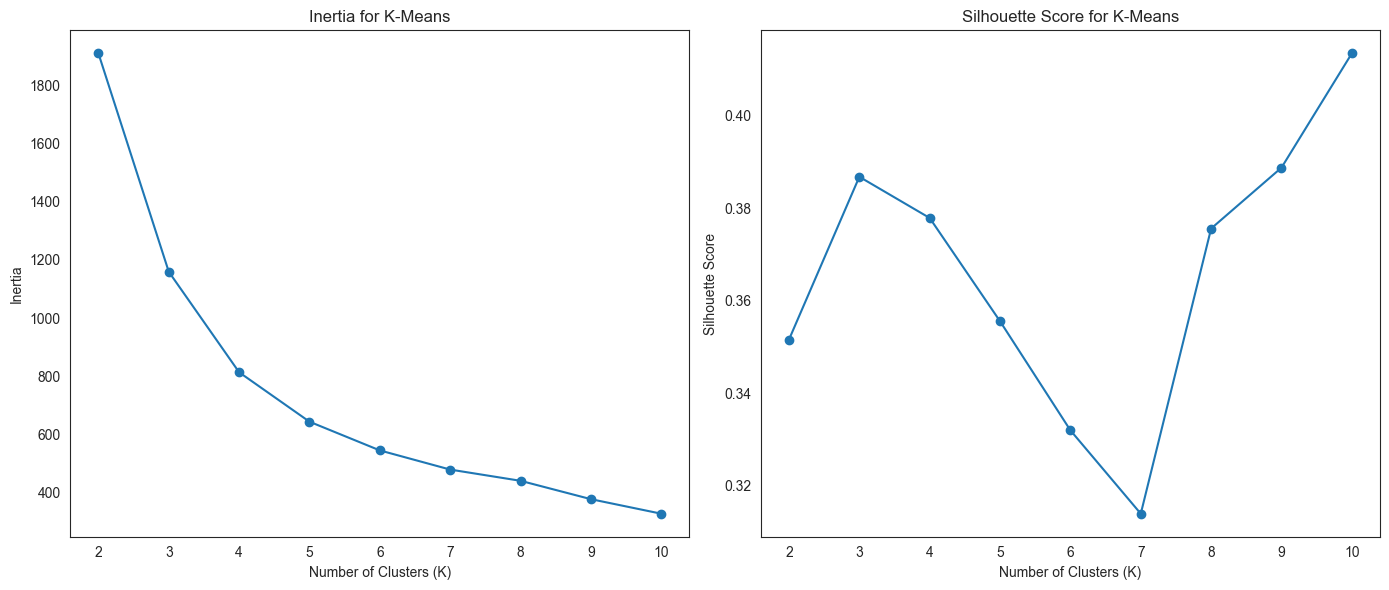

Best K for K-Means: 10


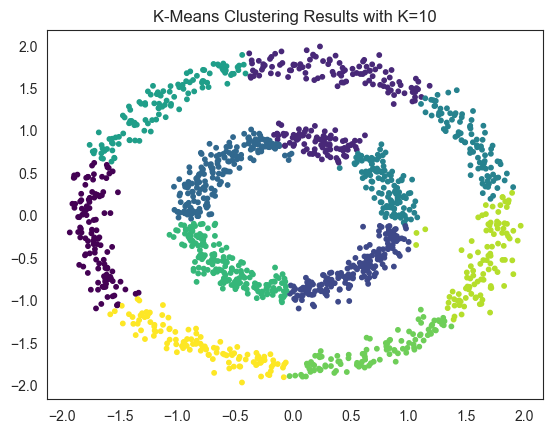

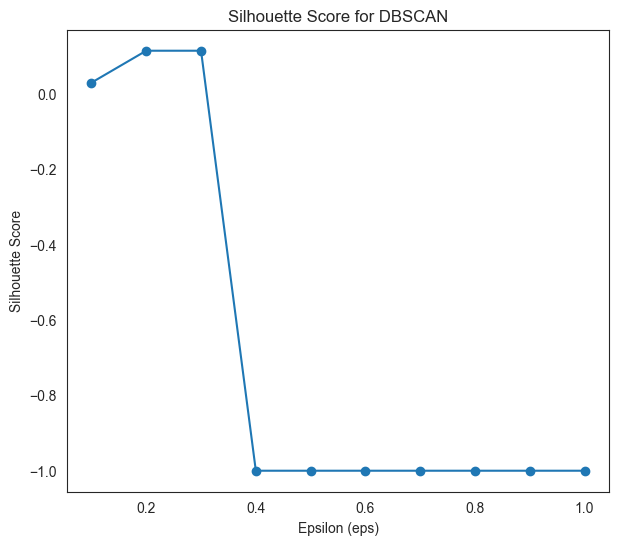

Best eps for DBSCAN: 0.2


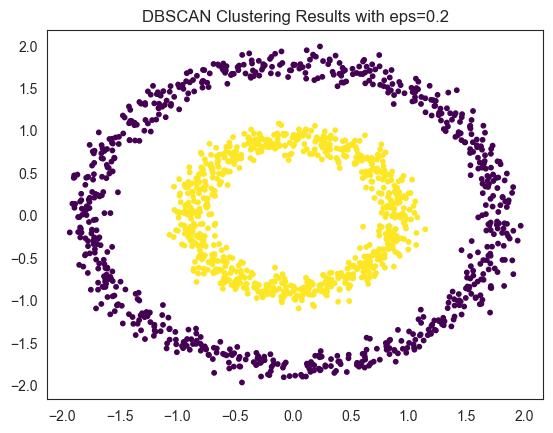

K-Means:
K-Means is effective for spherical clusters but struggles with non-spherical clusters like the noisy circle data.
It requires specifying the number of clusters (K) and may not perform well with varying cluster densities.

DBSCAN:
DBSCAN is effective for non-spherical clusters and can handle varying cluster densities.
It does not require specifying the number of clusters and can identify noise points.
However, it requires tuning the eps parameter, which can be challenging.


In [61]:
#Answer: 
# Function to run K-means with different K and calculate inertia and silhouette scores
def run_kmeans(X, max_k=10):
    inertia = []
    silhouette_scores = []
    K_range = range(2, max_k + 1)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    return K_range, inertia, silhouette_scores

# Run K-means on the data
K_range, inertia, silhouette_scores = run_kmeans(X)

# Plot inertia and silhouette scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Inertia for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Select the best K based on silhouette score
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best K for K-Means: {best_k}")

# Run K-means with the best K
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

# Plot K-means clustering results
plt.scatter(X[:, 0], X[:, 1], s=10, c=labels_kmeans, cmap='viridis')
plt.title(f'K-Means Clustering Results with K={best_k}')
plt.show()

# Function to run DBSCAN with different eps and calculate silhouette scores
def run_dbscan(X, eps_values):
    silhouette_scores = []
    
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:  # More than one cluster
            silhouette_scores.append(silhouette_score(X, labels))
        else:
            silhouette_scores.append(-1)  # Invalid silhouette score for single cluster
    
    return eps_values, silhouette_scores

# Run DBSCAN on the data
eps_values = np.arange(0.1, 1.1, 0.1)
eps_range, silhouette_scores_dbscan = run_dbscan(X, eps_values)

# Plot silhouette scores for DBSCAN
plt.figure(figsize=(7, 6))
plt.plot(eps_range, silhouette_scores_dbscan, marker='o')
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.show()

# Select the best eps based on silhouette score
best_eps = eps_range[np.argmax(silhouette_scores_dbscan)]
print(f"Best eps for DBSCAN: {best_eps}")

# Run DBSCAN with the best eps
dbscan = DBSCAN(eps=best_eps)
labels_dbscan = dbscan.fit_predict(X)

# Plot DBSCAN clustering results
plt.scatter(X[:, 0], X[:, 1], s=10, c=labels_dbscan, cmap='viridis')
plt.title(f'DBSCAN Clustering Results with eps={best_eps}')
plt.show()

# Comment on the capabilities of each clustering algorithm
print("K-Means:")
print("K-Means is effective for spherical clusters but struggles with non-spherical clusters like the noisy circle data.")
print("It requires specifying the number of clusters (K) and may not perform well with varying cluster densities.")

print("\nDBSCAN:")
print("DBSCAN is effective for non-spherical clusters and can handle varying cluster densities.")
print("It does not require specifying the number of clusters and can identify noise points.")
print("However, it requires tuning the eps parameter, which can be challenging.")